# Statsmodels buat ngecek regresi

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',False)
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

In [2]:
df = pd.read_csv('data_bersih.csv')
df = df.drop(['Unnamed: 0','index'], axis = 1)
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13024 entries, 0 to 13513
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   kamar_mandi    13024 non-null  int64  
 1   kamar_tidur    13024 non-null  int64  
 2   luas_bangunan  13024 non-null  float64
 3   luas_tanah     13024 non-null  float64
 4   harga          13024 non-null  float64
 5   kecamatan      13024 non-null  object 
 6   garasi         13024 non-null  bool   
 7   kolam_renang   13024 non-null  bool   
 8   taman          13024 non-null  bool   
 9   gym            13024 non-null  bool   
 10  jumlah_lantai  13024 non-null  int64  
 11  listrik        13024 non-null  float64
dtypes: bool(4), float64(4), int64(3), object(1)
memory usage: 966.6+ KB


In [3]:
num = [i for i in df.columns if df[i].dtypes in ['int64', 'float']]
cat = [i for i in df.columns if df[i].dtypes in ['O', 'bool']]

In [4]:
df[cat] = df[cat].astype('O')

In [5]:
from feature_engine.encoding import OrdinalEncoder as OE

In [6]:
oe = OE(variables = [i for i in cat])
oe.fit(df,df['harga'])

OrdinalEncoder(variables=['kecamatan', 'garasi', 'kolam_renang', 'taman',
                          'gym'])

In [7]:
x = oe.transform(df)

In [8]:
from sklearn.preprocessing import StandardScaler as ss

In [9]:
x_scale = ss()
x_scale.fit(x.drop('harga',axis = 1))
y_scale = ss()
y_scale.fit(x[['harga']])

StandardScaler()

In [10]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13024 entries, 0 to 13513
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   kamar_mandi    13024 non-null  int64  
 1   kamar_tidur    13024 non-null  int64  
 2   luas_bangunan  13024 non-null  float64
 3   luas_tanah     13024 non-null  float64
 4   harga          13024 non-null  float64
 5   kecamatan      13024 non-null  int64  
 6   garasi         13024 non-null  int64  
 7   kolam_renang   13024 non-null  int64  
 8   taman          13024 non-null  int64  
 9   gym            13024 non-null  int64  
 10  jumlah_lantai  13024 non-null  int64  
 11  listrik        13024 non-null  float64
dtypes: float64(4), int64(8)
memory usage: 1.3 MB


In [11]:
import statsmodels.api as sm

In [12]:
x = x_scale.transform(x.drop(['harga'],axis = 1))
x = pd.DataFrame(x)
x.columns = df.drop('harga', axis = 1).columns

y = y_scale.transform(df[['harga']])
y = pd.DataFrame(y)
y.columns = ['harga']
initial_data = pd.concat([x,y],axis = 1)
x = sm.add_constant(x)

In [13]:
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  harga   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     1524.
Date:                Mon, 24 May 2021   Prob (F-statistic):               0.00
Time:                        05:33:09   Log-Likelihood:                -13088.
No. Observations:               13024   AIC:                         2.620e+04
Df Residuals:                   13012   BIC:                         2.629e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.735e-17      0.006  -2.99e-15      1.000      -0.011       0.011
kamar_mandi      -0.0073      0.009     -0.772      0.440      -0.026       0.011
kamar_tidur      -0.0380      0.009     -4.192      0.000      -0.056      -0.020
luas_bangunan     0.4329      0.009     47.479      0.000       0.415       0.451
luas_tanah        0.2839      0.008     33.744      0.000       0.267       0.300
kecamatan         0.1764      0.006     27.666      0.000       0.164       0.189
garasi           -0.0050      0.006     -0.839      0.401      -0.017       0.007
kolam_renang      0.0240      0.006      3.797      0.000       0.012       0.036
taman             0.0037      0.006      0.635      0.526      -0.008       0.015
gym               0.0175      0.006      2.972      0.003       0.006       0.029
jumlah_lantai    -0.0246      0.006     -4.084      0.000      -0.036      -0.013
listrik           0.0380      0.006      6.331      0.000       0.026       0.050
==============================================================================
Omnibus:                    14787.908   Durbin-Watson:                   1.752
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         10655433.452
Skew:                           5.144   Prob(JB):                         0.00
Kurtosis:                     142.748   Cond. No.                         3.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
pd.DataFrame(model.params).reset_index().sort_values(by = 0, ascending = False)

,index,0
3,luas_bangunan,4.328898e-01
4,luas_tanah,2.838855e-01
5,kecamatan,1.764457e-01
11,listrik,3.804018e-02
7,kolam_renang,2.404318e-02
9,gym,1.753437e-02
8,taman,3.745422e-03
0,const,-1.734723e-17
6,garasi,-4.961332e-03
1,kamar_mandi,-7.325107e-03


In [15]:
from sklearn.metrics import mean_squared_error as mse
from math import sqrt

In [16]:
y_pred = model.predict(x)
sqrt(mse(y_pred, y))

0.6610063919689214

In [17]:
from scipy import stats

In [18]:
for k in cat+num:
    if df[k].nunique() <100:
        print("="*45,f' {k} ',"="*45)
        var = [i for i in df[k].unique()]
        pair = {}
        udah = []
        for i in var:
            for j in var:
                if (j not in udah) & (i != j):
                    ttest = stats.ttest_ind(a = df[df[k] == i]['harga'],
                                            b = df[df[k] == j]['harga'])
                    p_value = ttest.pvalue
                    pair[f'{i} - {j}'] = p_value
            udah.append(i)
        count = 0
        for i,j in pair.items():
            if j >= 0.05:
                print(i)
                count += 1
        print(f'{k}: {count/len(pair)*100}')
        print("="*100,end = '\n')

=============================================  kecamatan  =============================================
Cilandak - Tebet
Cilandak - Pasar Minggu
Cilandak - Pancoran
Cilandak - Gambir
Kebayoran Baru - Kebayoran Lama
Kebayoran Baru - Setiabudi
Jagakarsa - Koja
Jagakarsa - Cakung
Jagakarsa - Kramat Jati
Jagakarsa - Makasar
Jagakarsa - Johar Baru
Jagakarsa - Kalideres
Jagakarsa - Cengkareng
Tebet - Pasar Minggu
Tebet - Jatinegara
Tebet - Senen
Tebet - Gambir
Tebet - Palmerah
Pasar Minggu - Pancoran
Pasar Minggu - Jatinegara
Pasar Minggu - Senen
Pasar Minggu - Gambir
Pasar Minggu - Palmerah
Kebayoran Lama - Setiabudi
Pesanggrahan - Tanjung Priok
Pesanggrahan - Kelapa Gading
Pesanggrahan - Pademangan
Pesanggrahan - Pulo Gadung
Pesanggrahan - Jatinegara
Pesanggrahan - Senen
Pesanggrahan - Kemayoran
Pesanggrahan - Cempaka Putih
Pesanggrahan - Sawah Besar
Pesanggrahan - Palmerah
Pesanggrahan - Kembangan
Pesanggrahan - Kebon Jeruk
Pesanggrahan - Taman Sari
Pesanggrahan - Tambora
Pancoran - Penja

# EDA

kamar_mandi


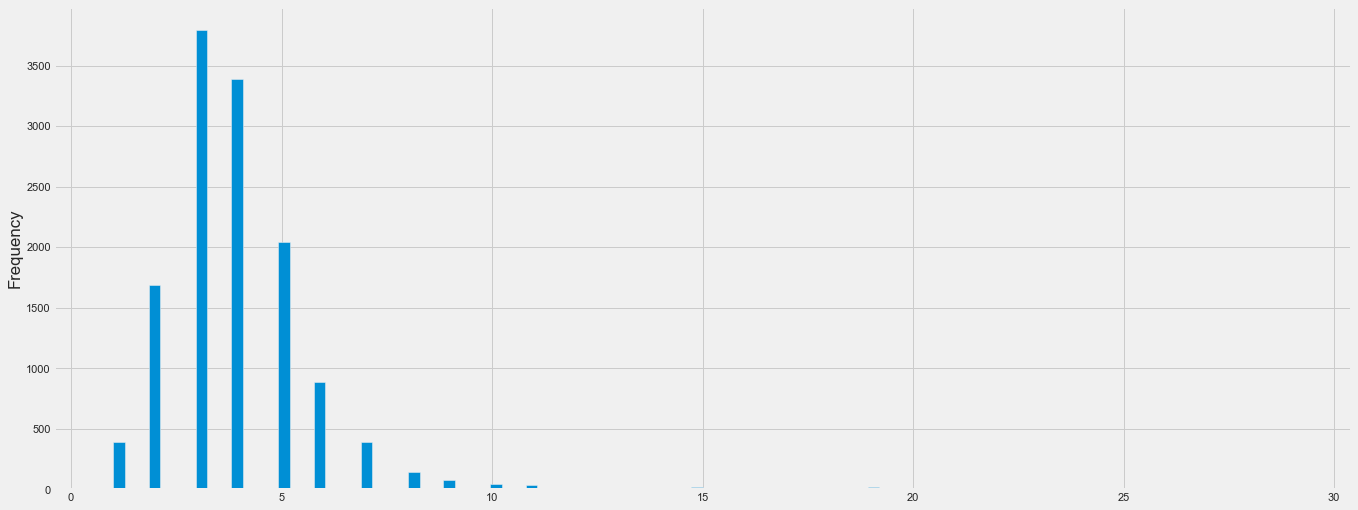

kamar_tidur


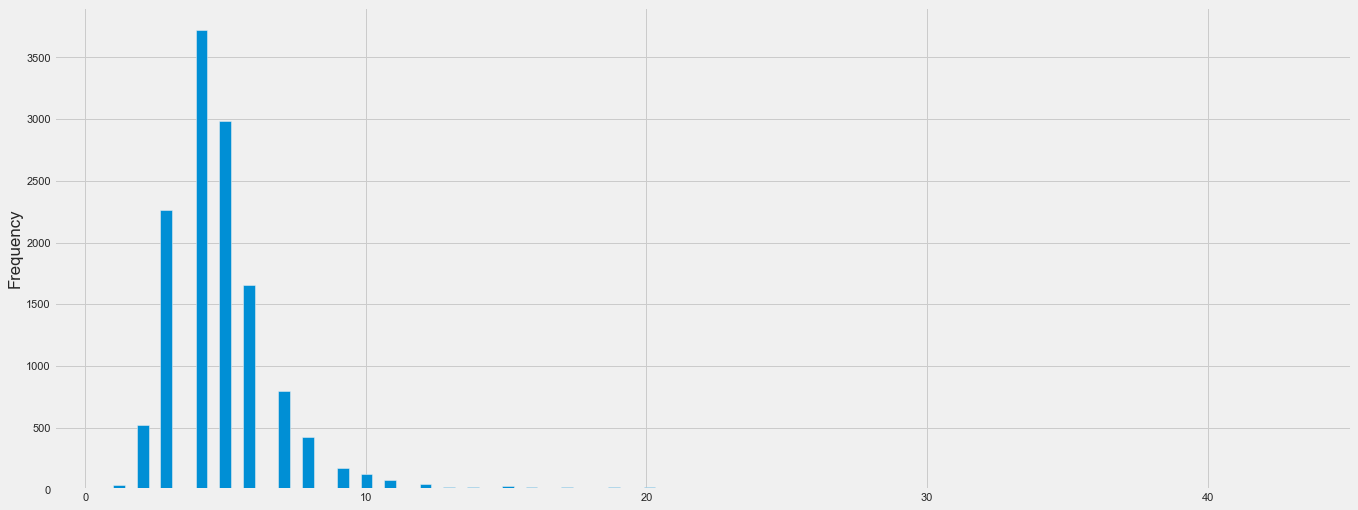

luas_bangunan


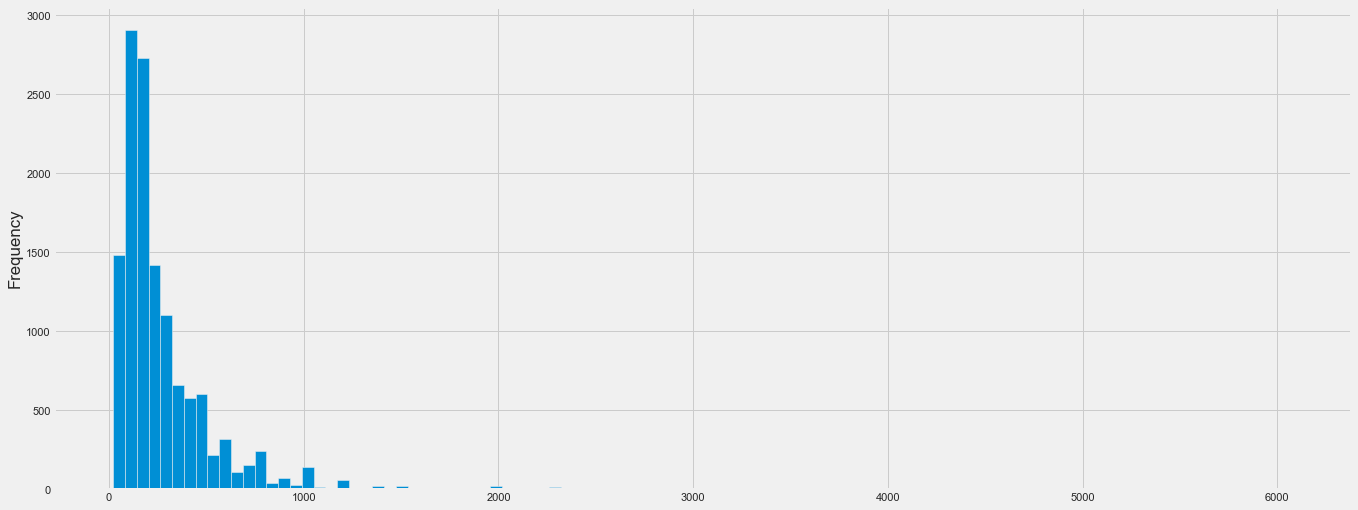

luas_tanah


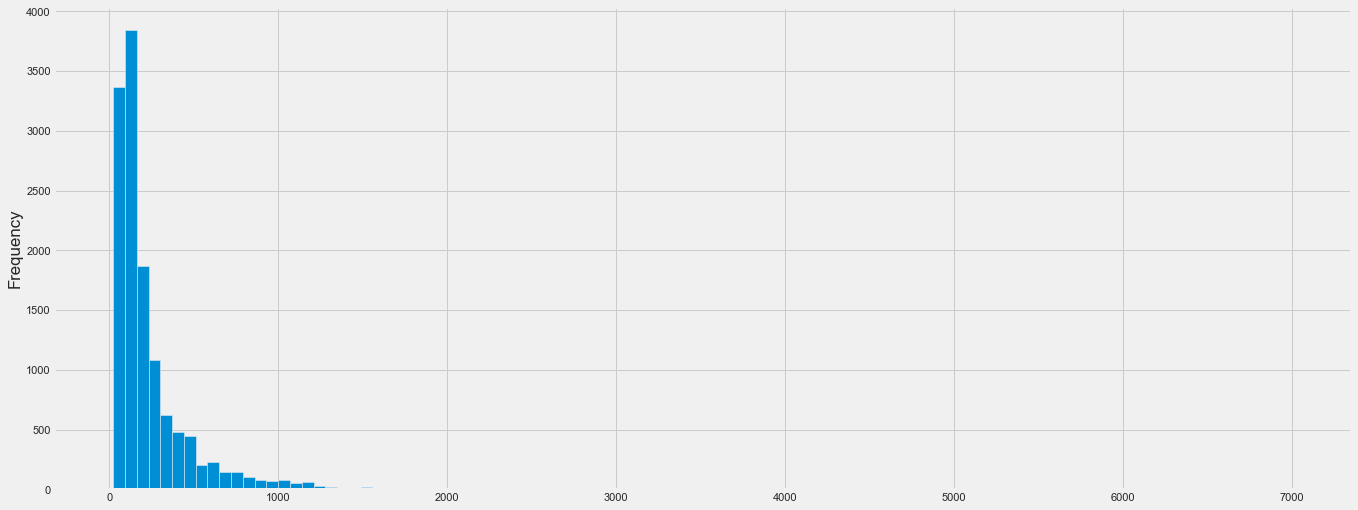

harga


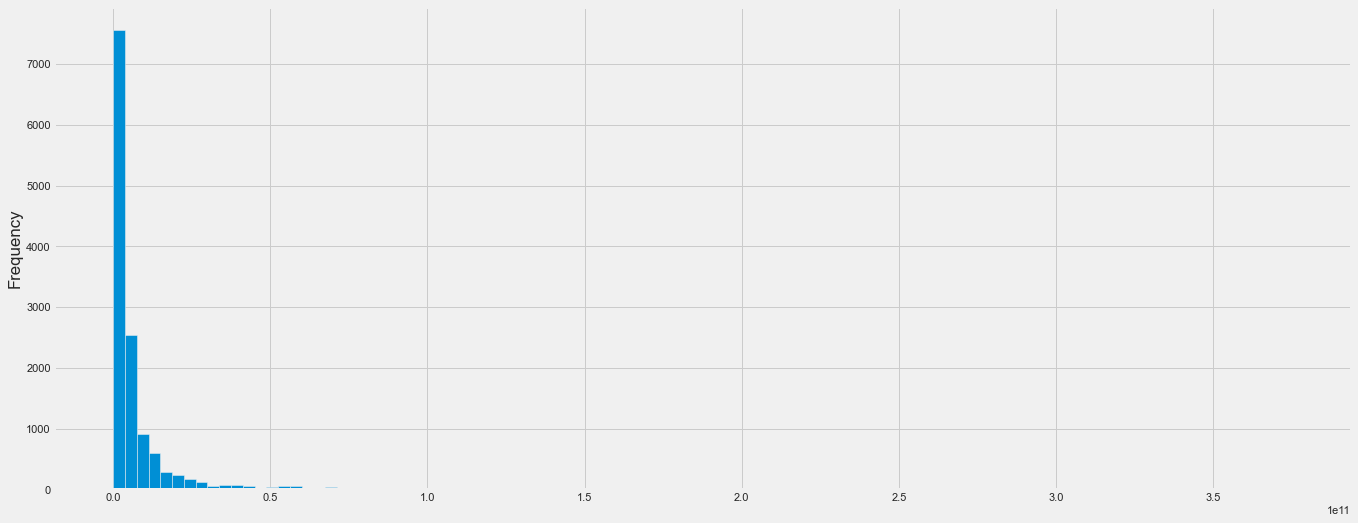

jumlah_lantai


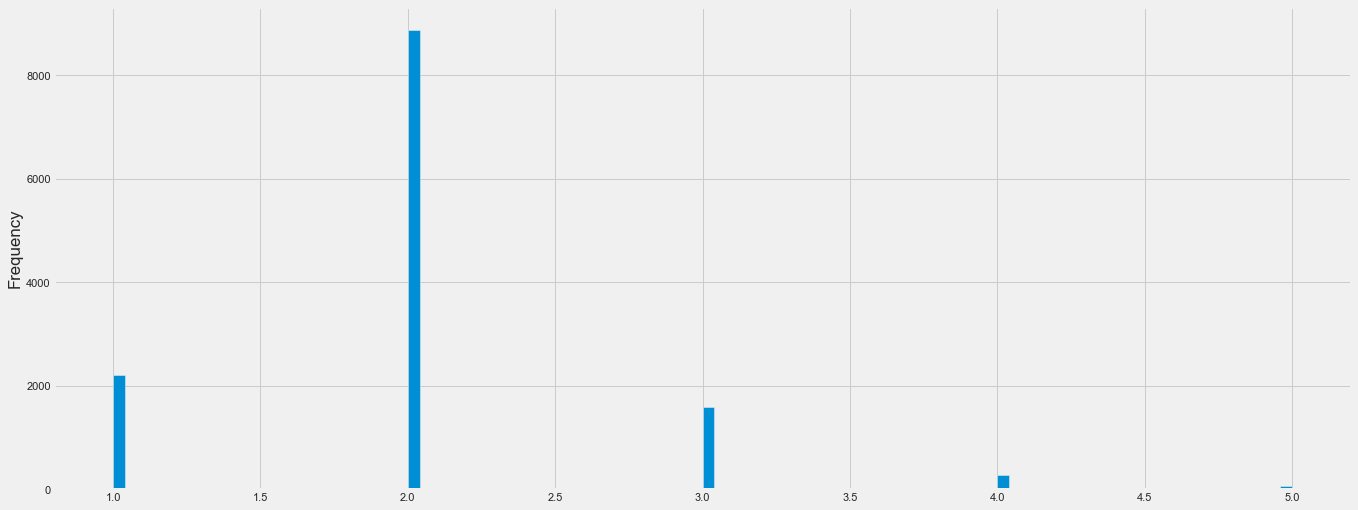

listrik


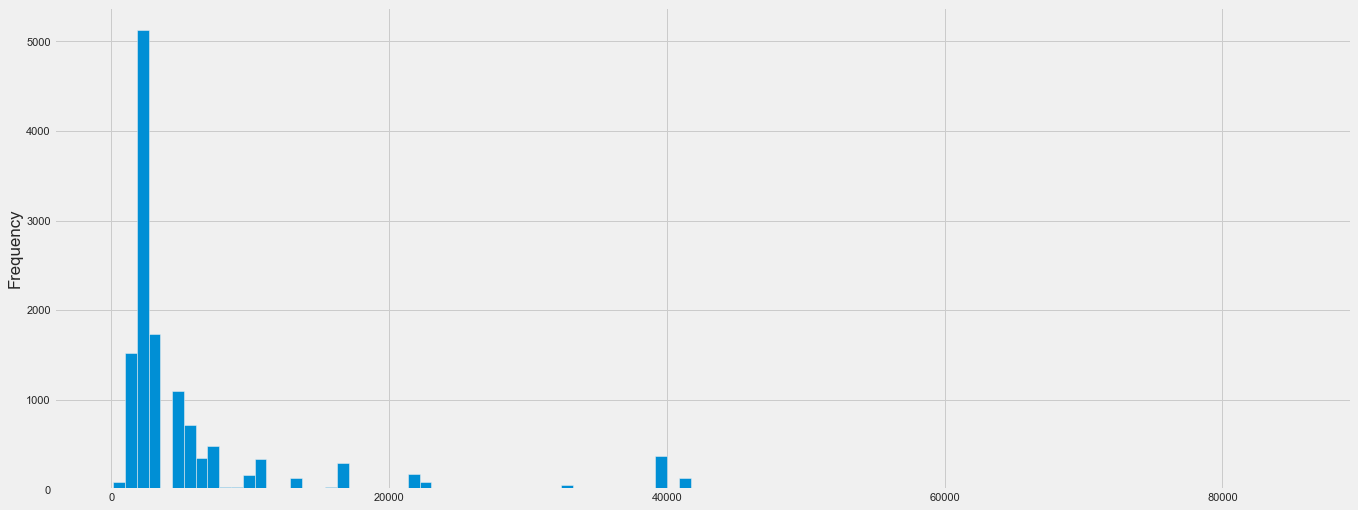

In [19]:
for i in num:
    print(i)
    df[i].plot.hist(bins = 100)
    plt.show()

kamar_mandi


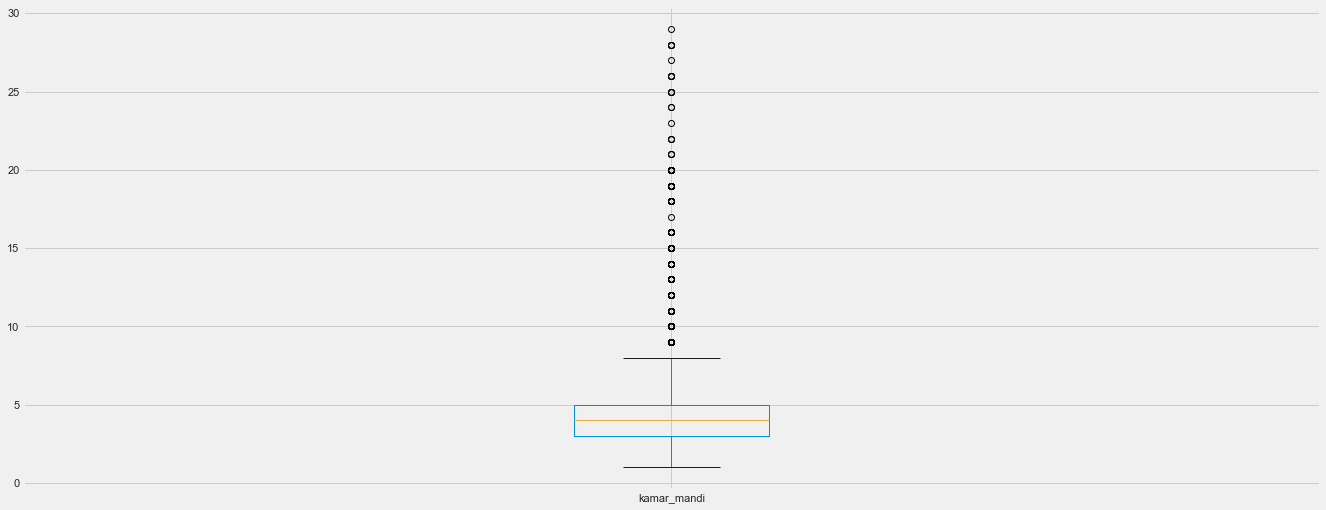

kamar_tidur


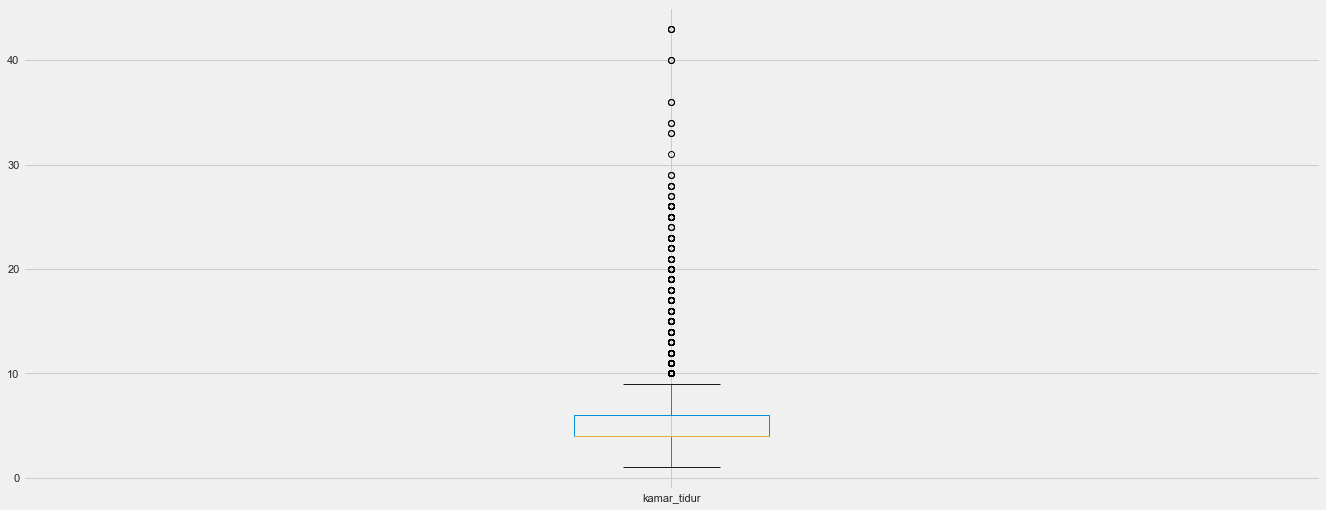

luas_bangunan


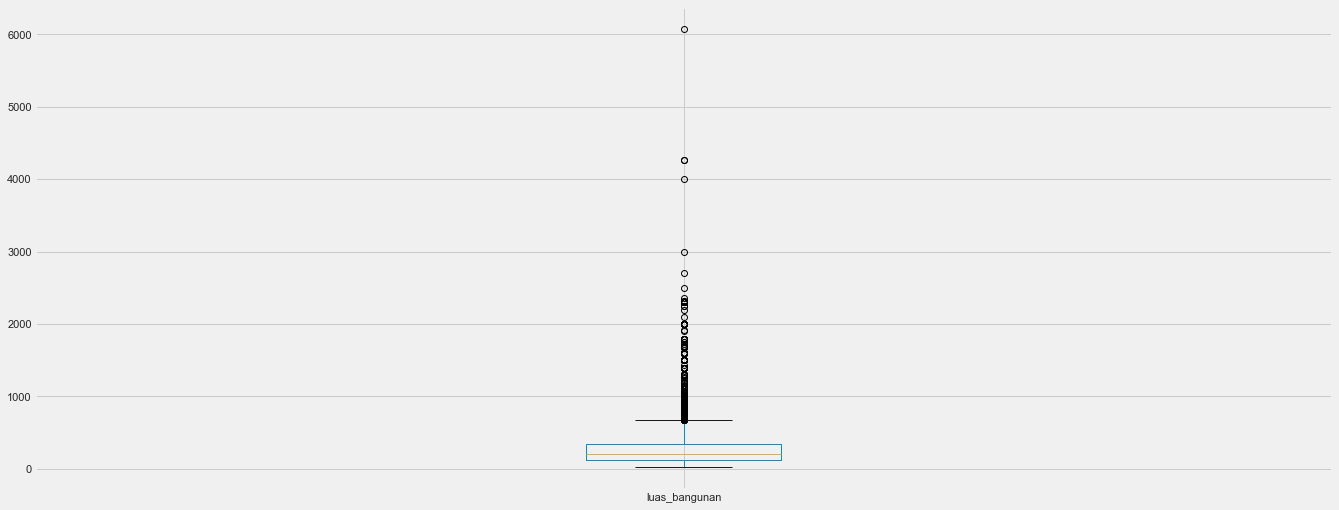

luas_tanah


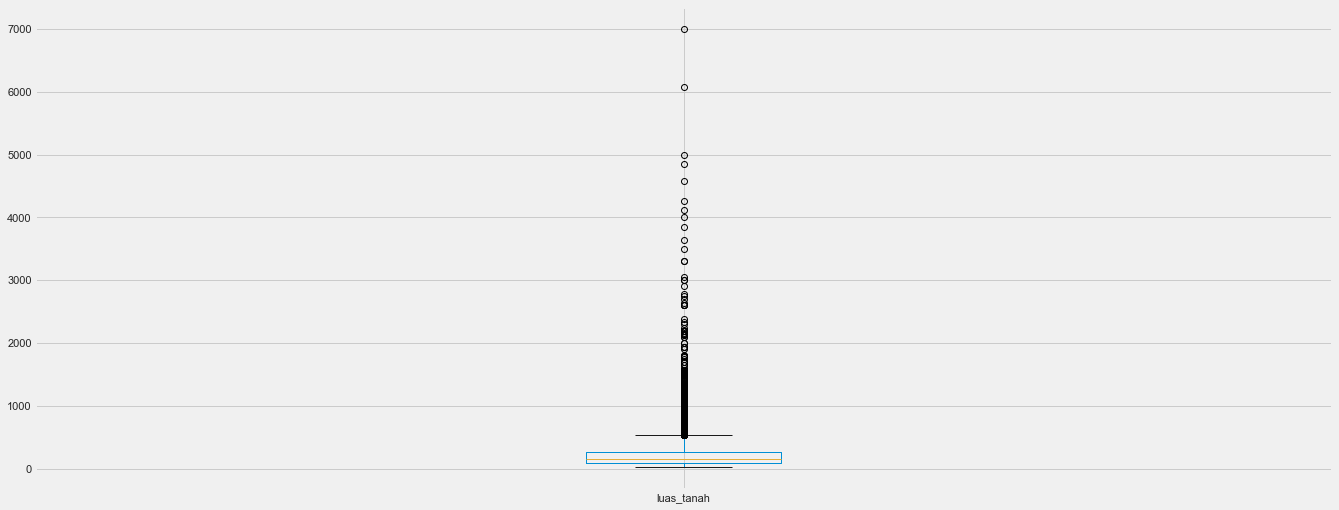

harga


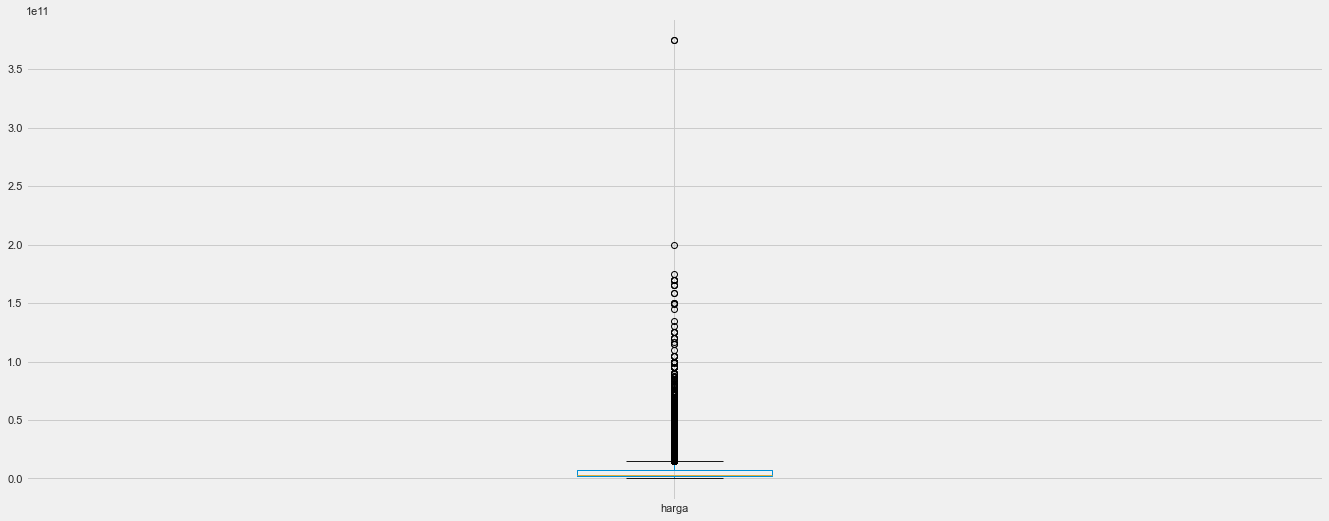

jumlah_lantai


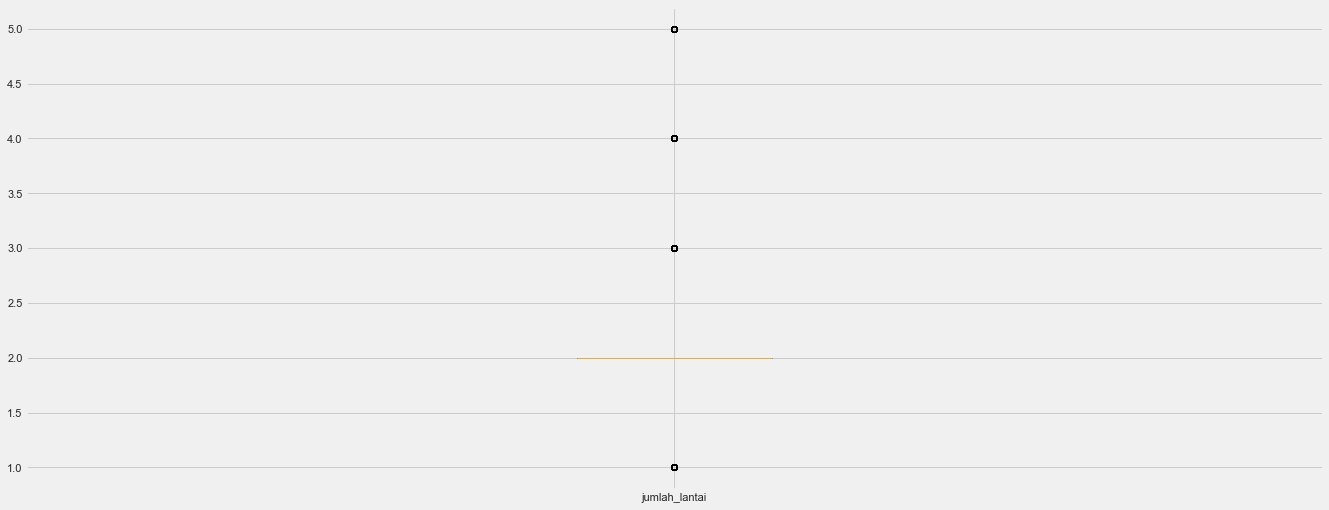

listrik


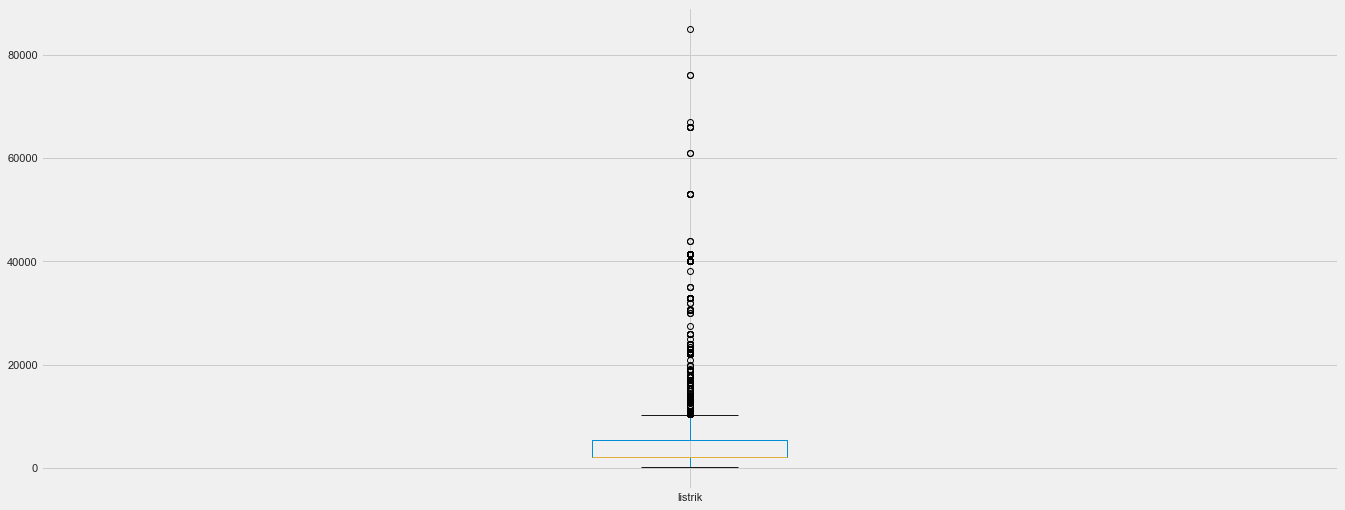

In [20]:
for i in num:
    print(i)
    df[i].plot.box()
    plt.show()

kecamatan


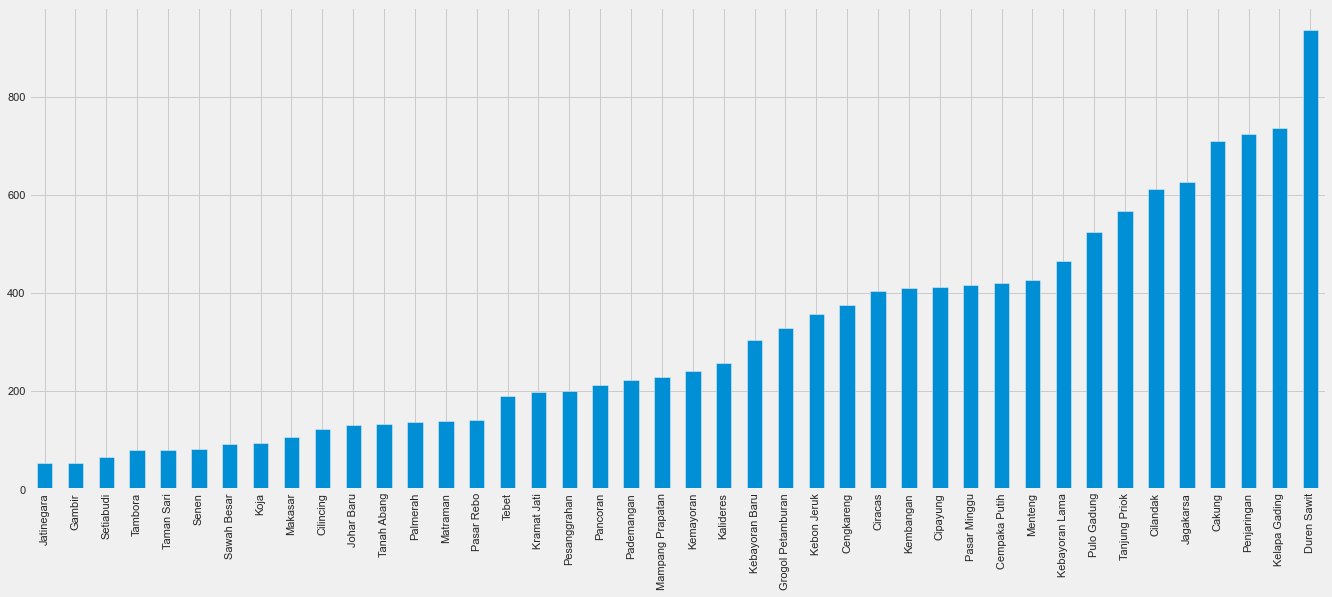

garasi


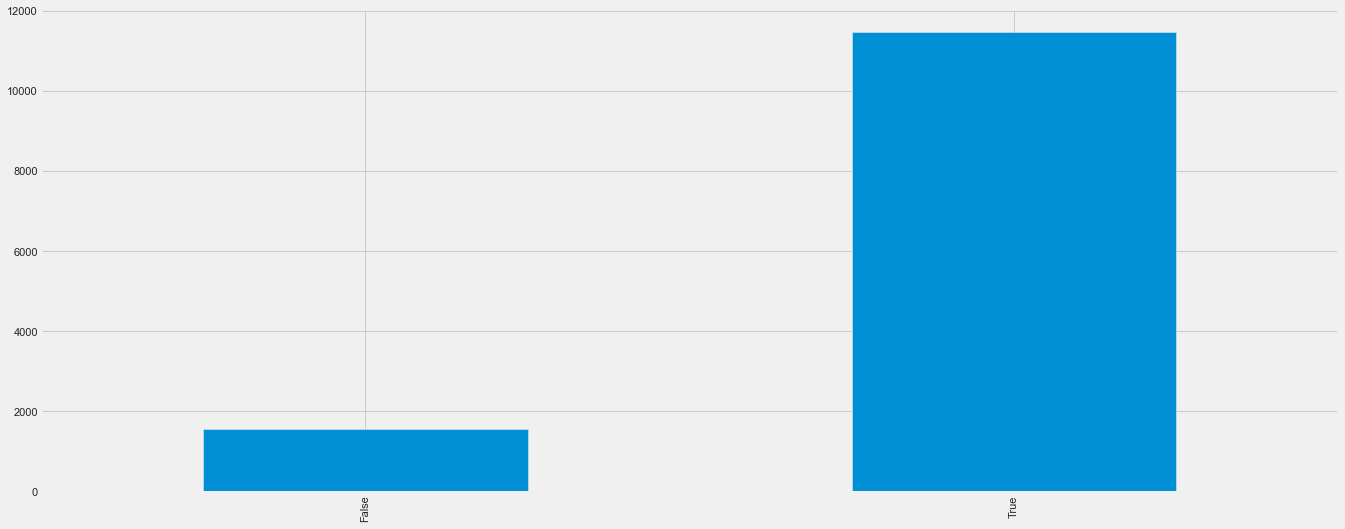

kolam_renang


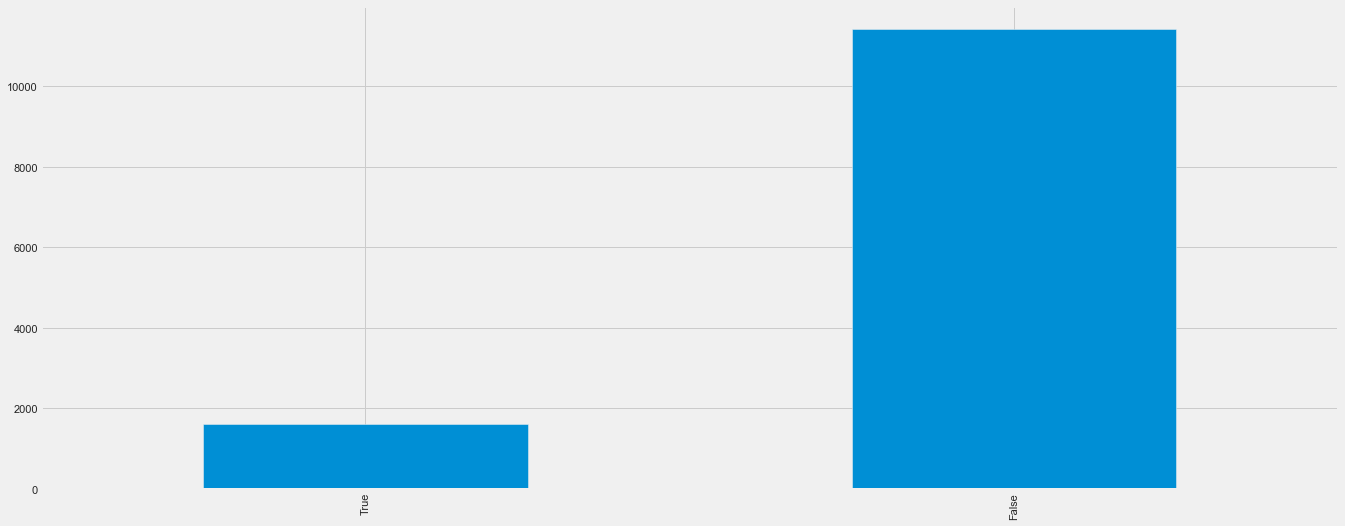

taman


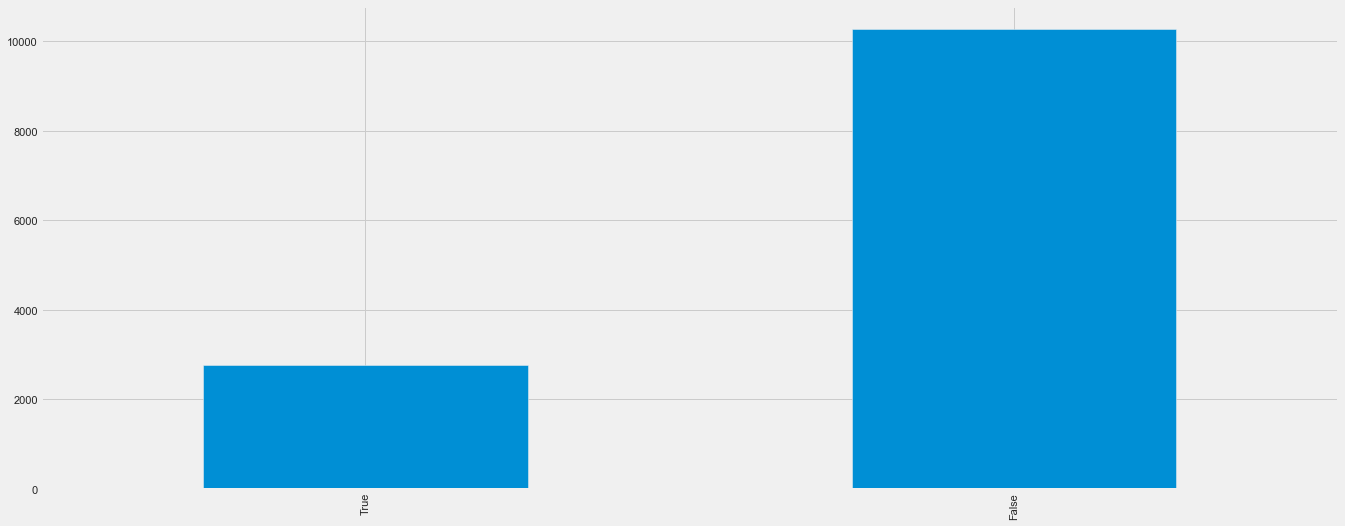

gym


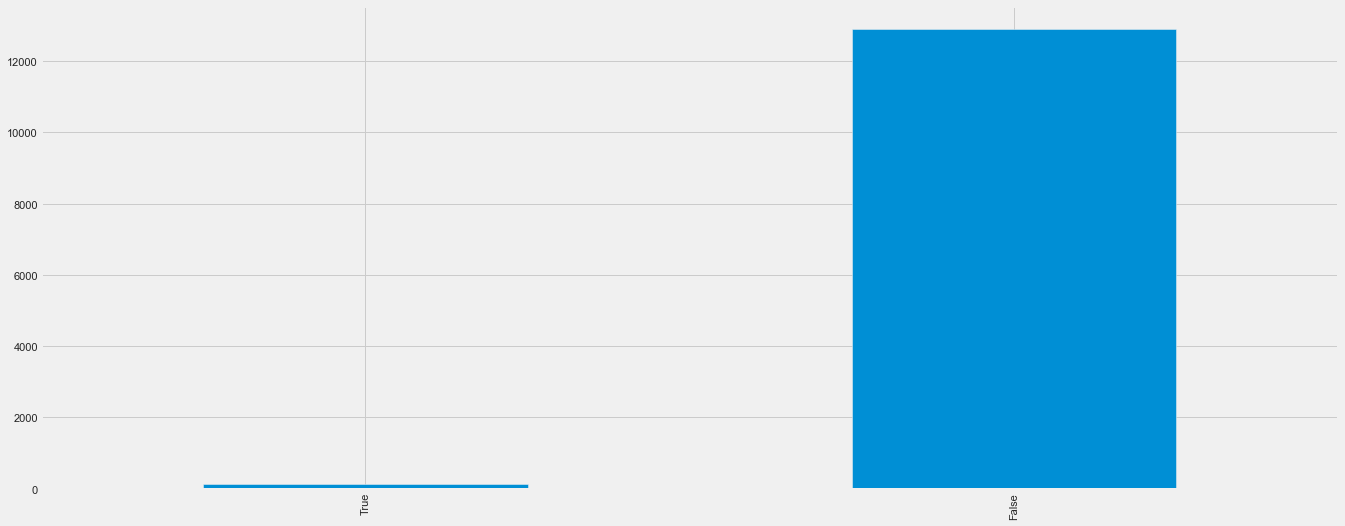

In [21]:
for i in cat:
    print(i)
    df[i].value_counts().sort_values().plot.bar()
    plt.show()

Masukin target (harga)

kamar_mandi


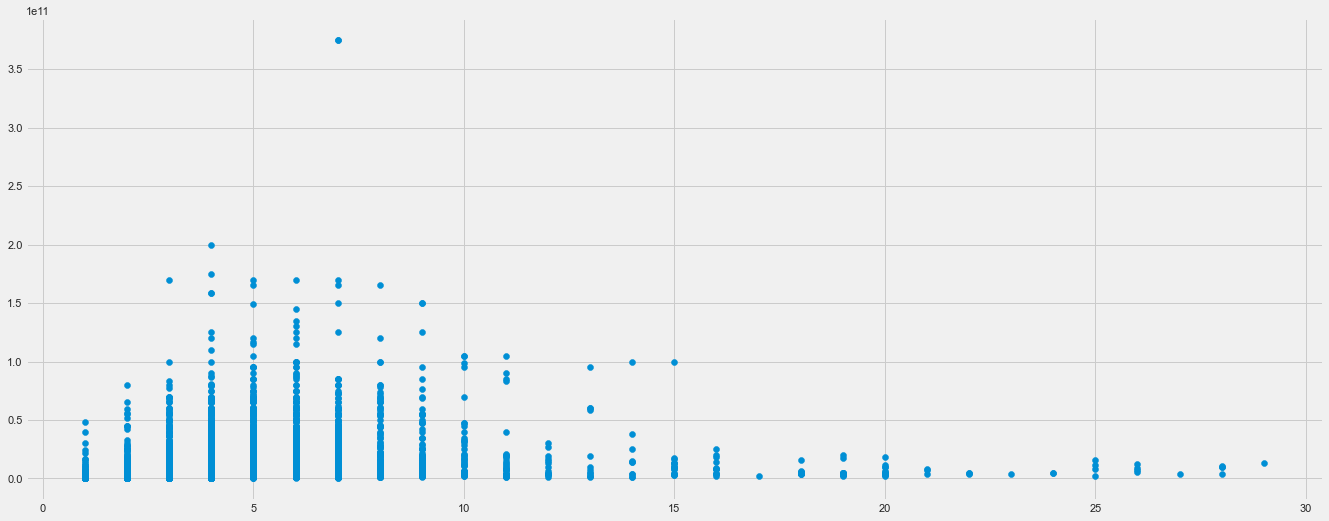

kamar_tidur


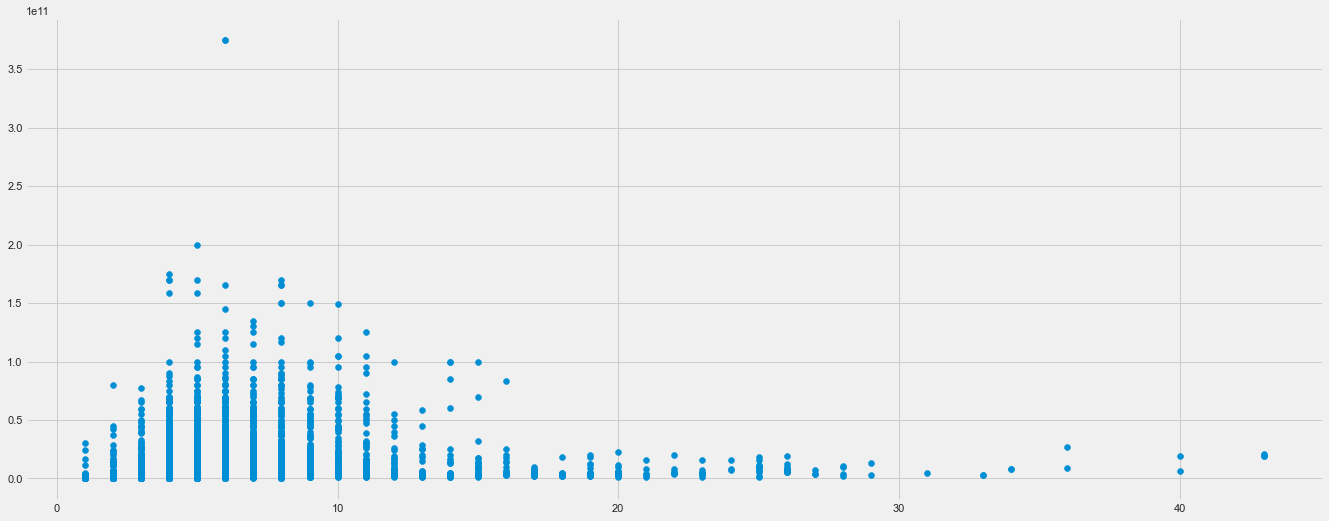

luas_bangunan


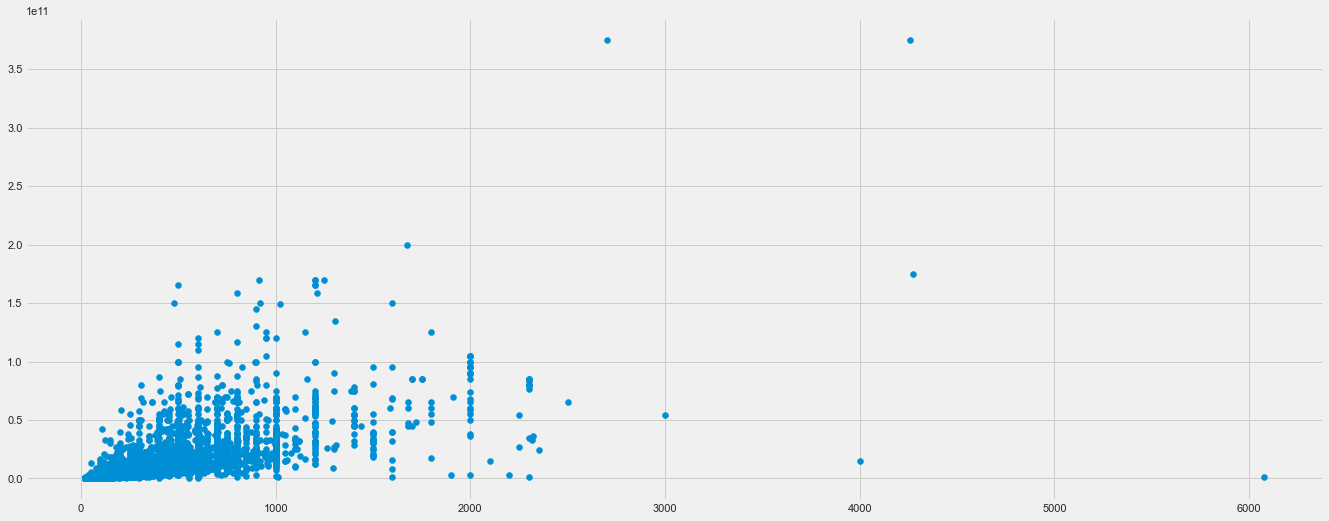

luas_tanah


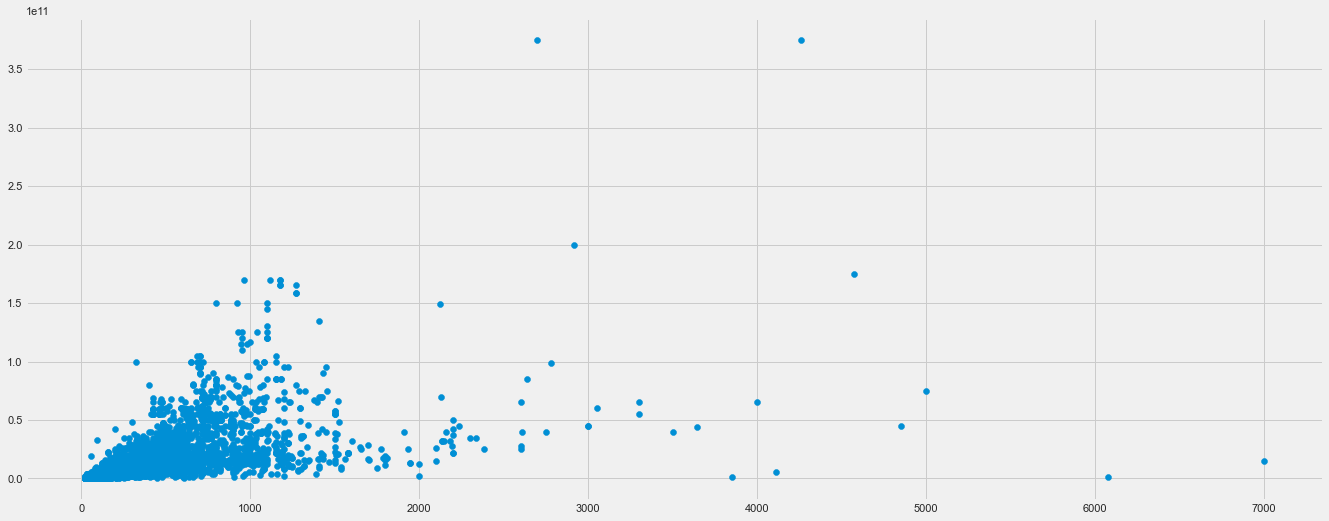

jumlah_lantai


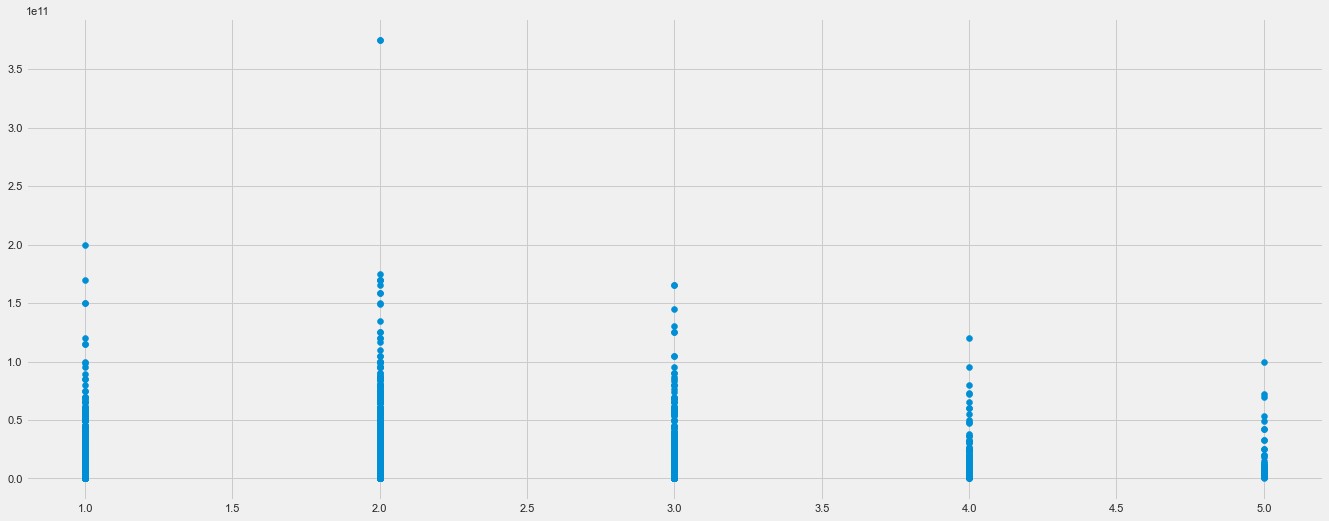

listrik


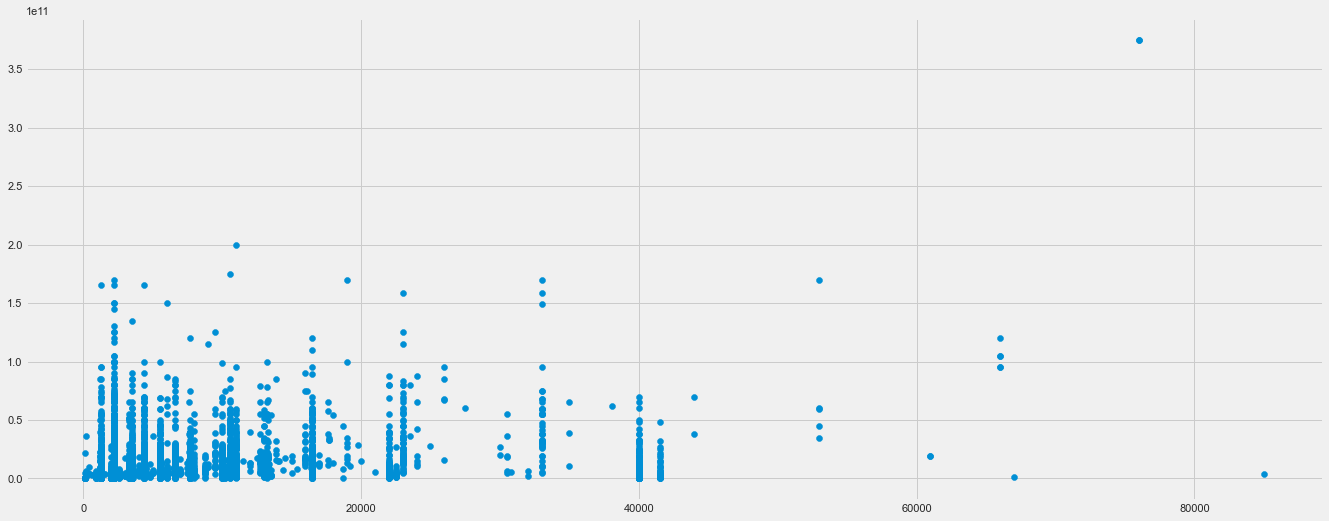

kecamatan


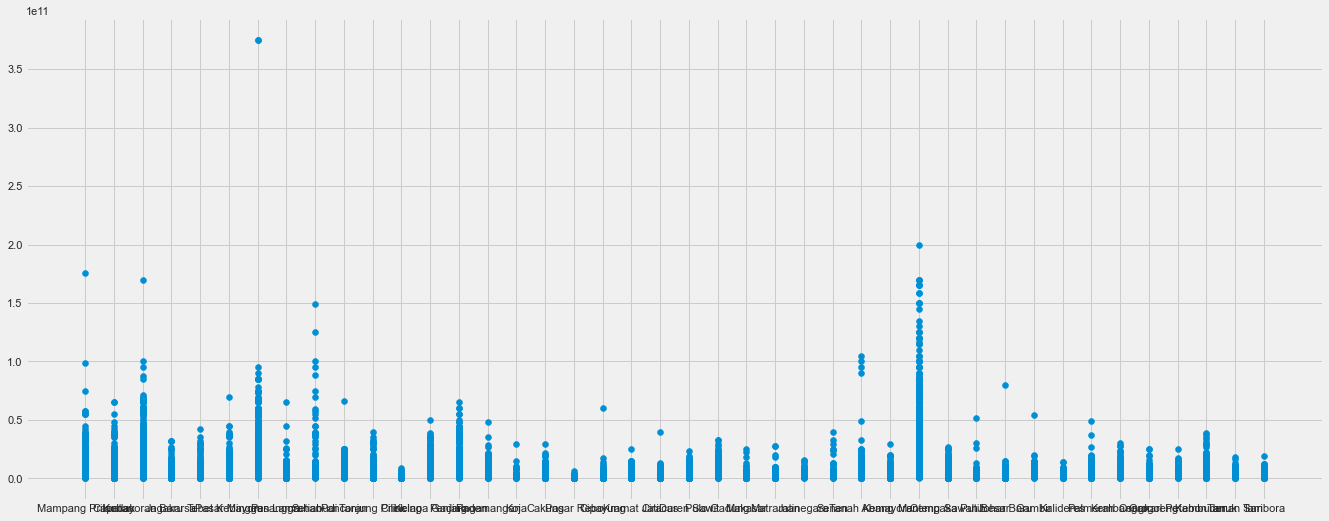

garasi


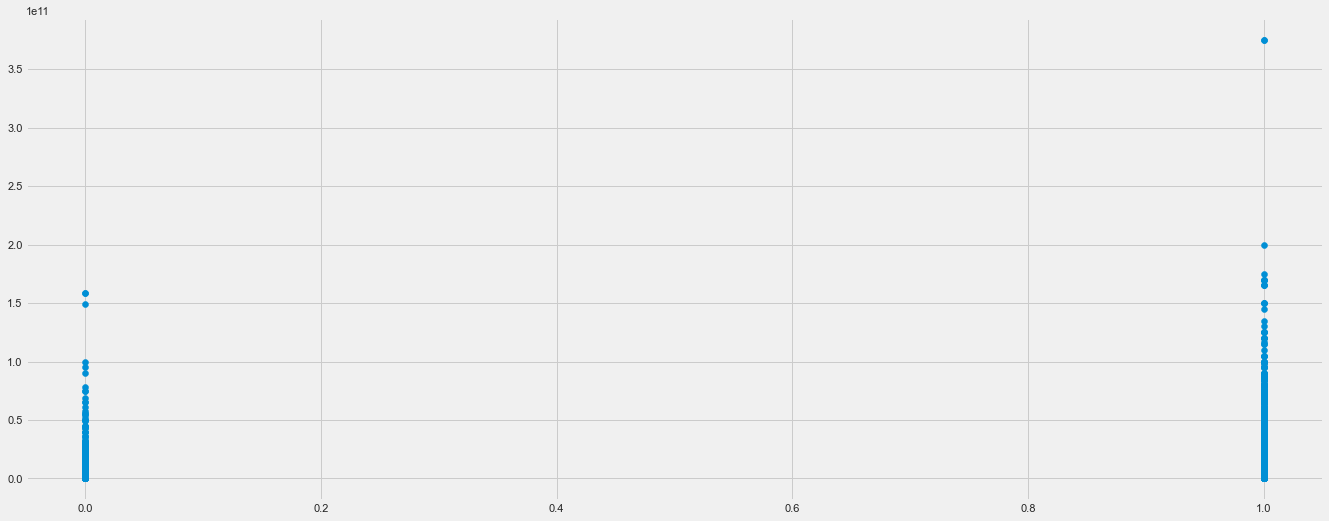

kolam_renang


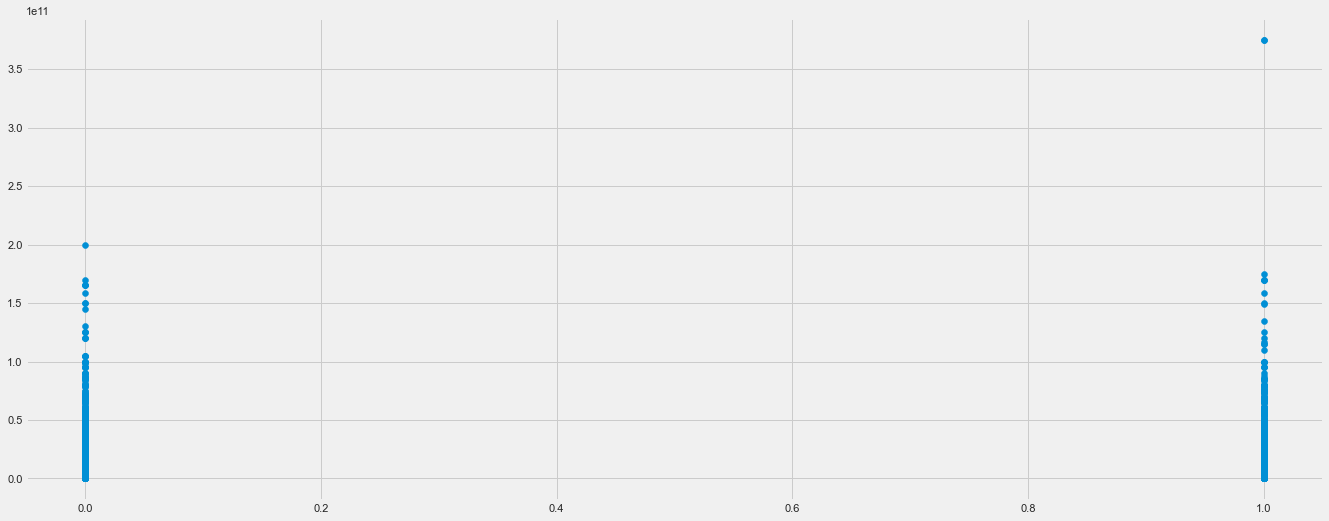

taman


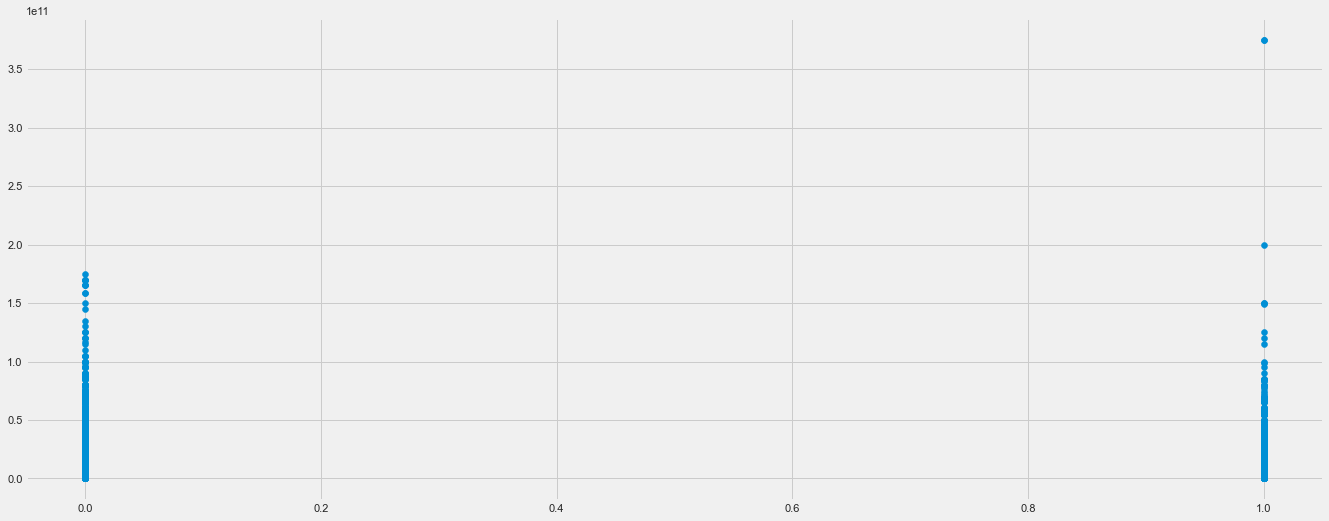

gym


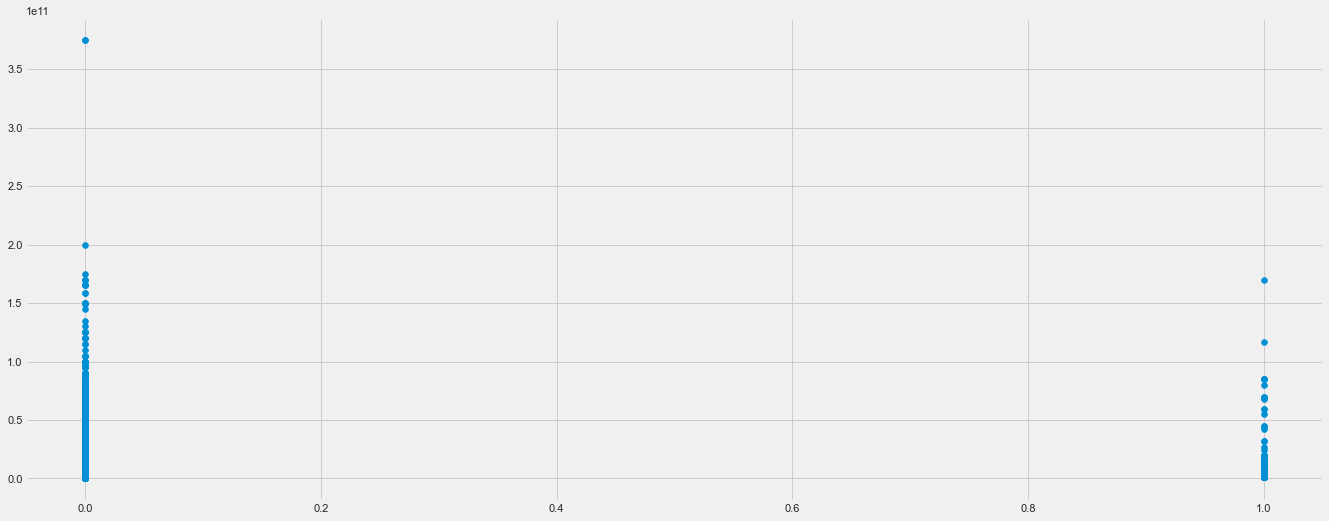

In [22]:
for i in num+cat:
    if i != 'harga':
        print(i)
        plt.scatter(df[i],df['harga'])
        plt.show()

kecamatan


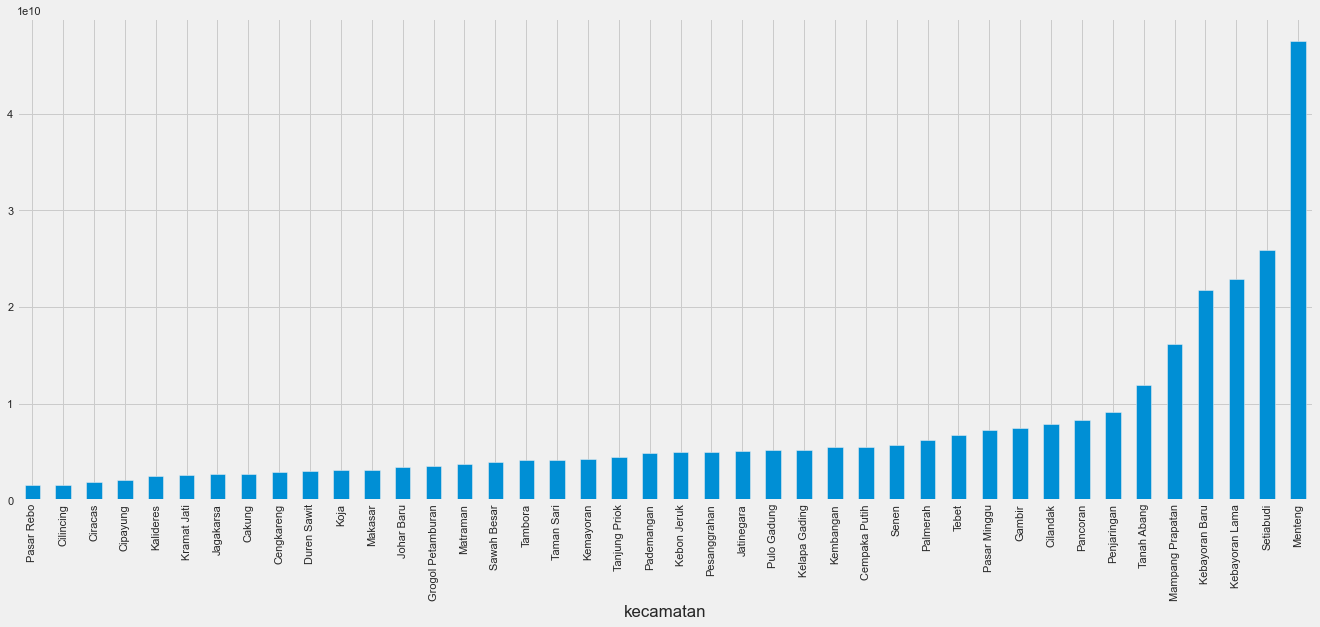

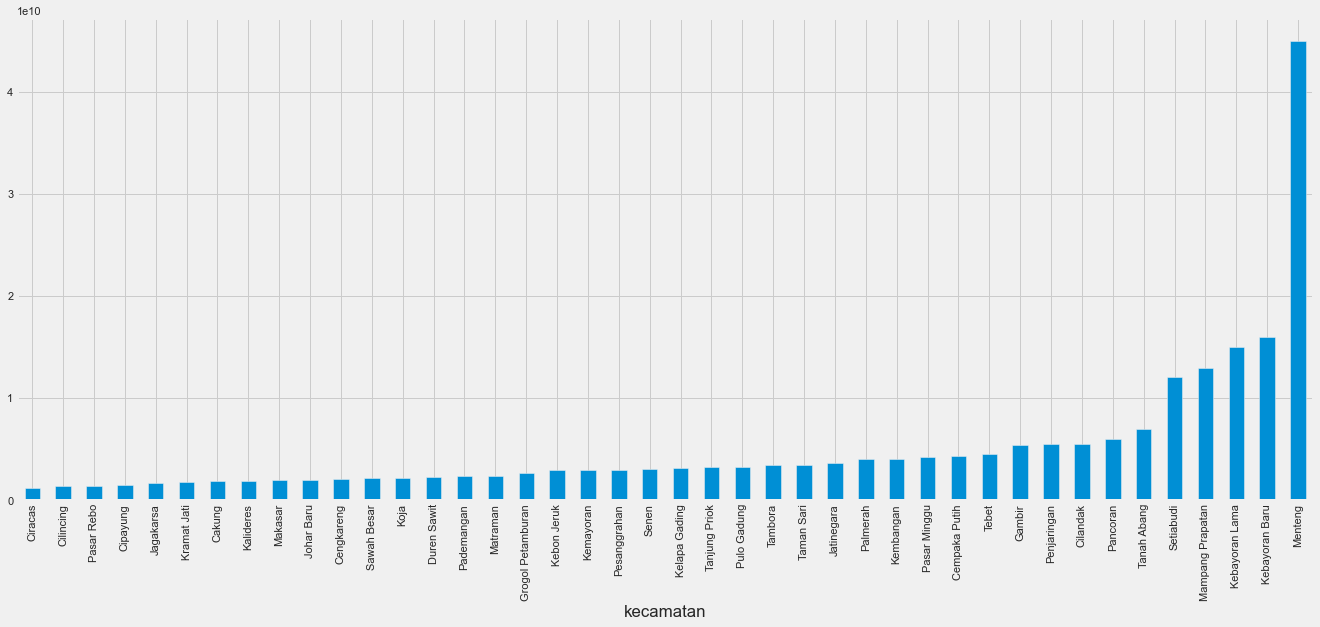

garasi


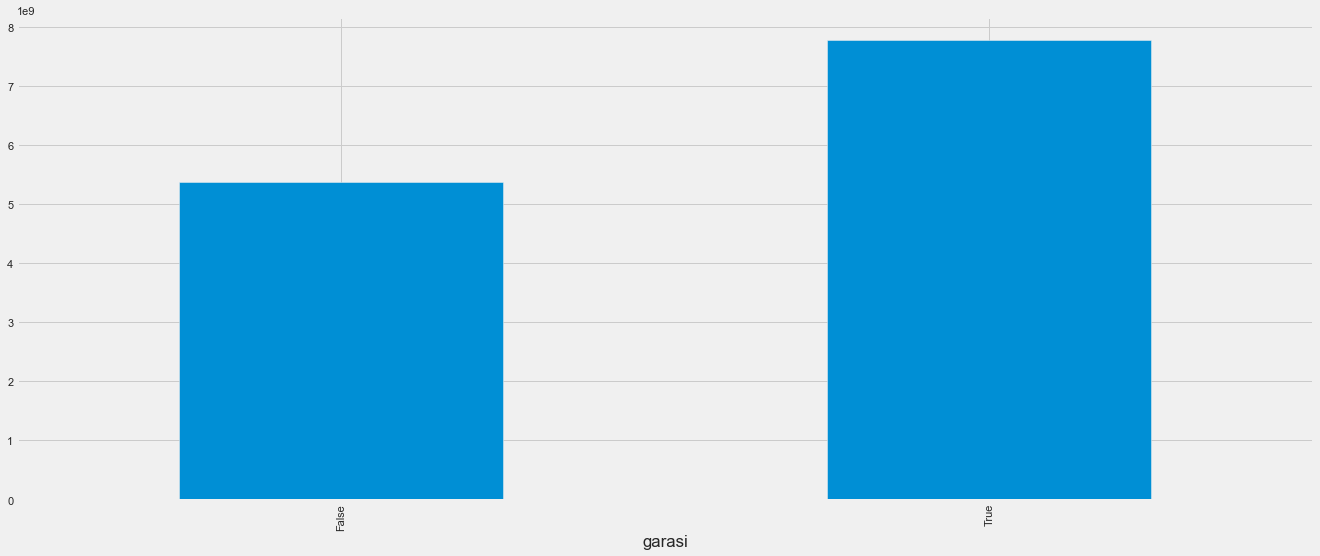

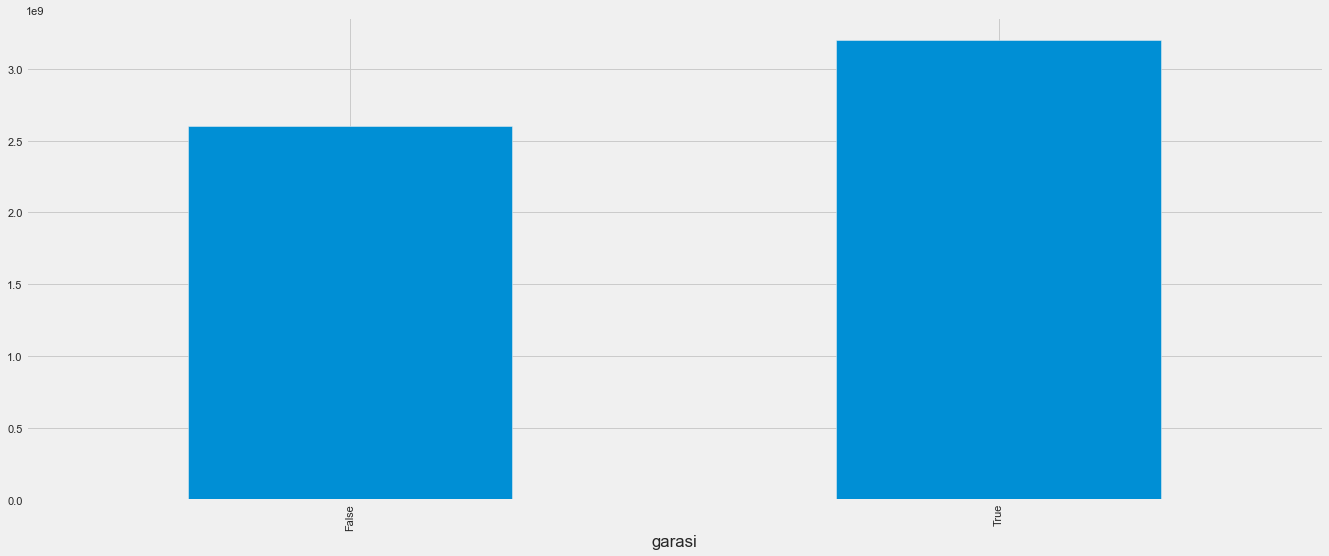

kolam_renang


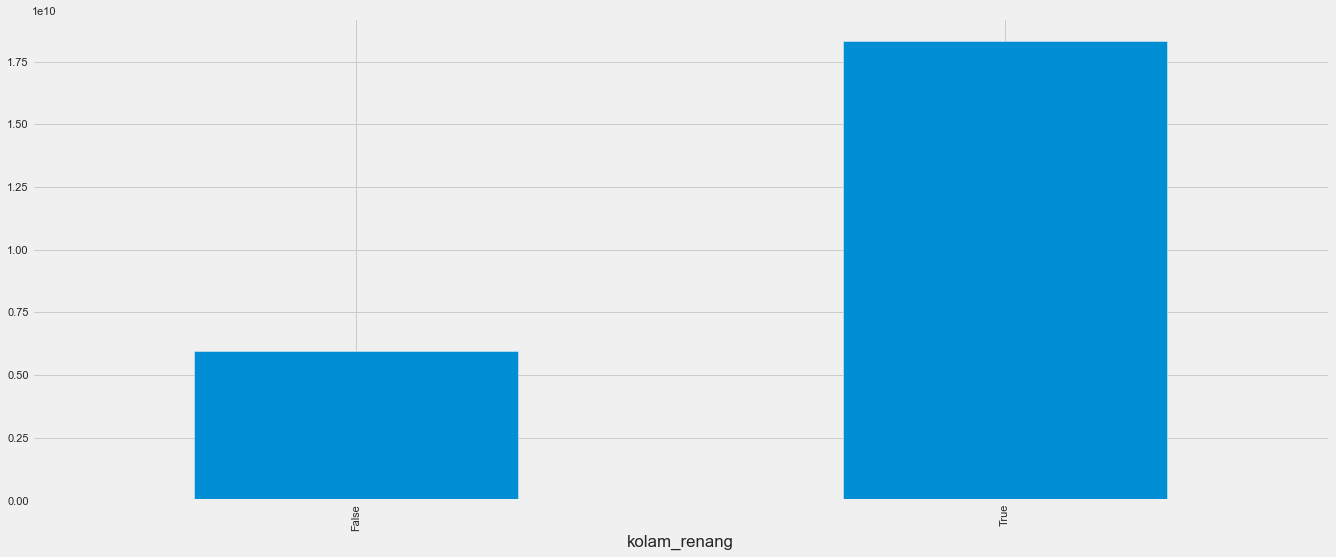

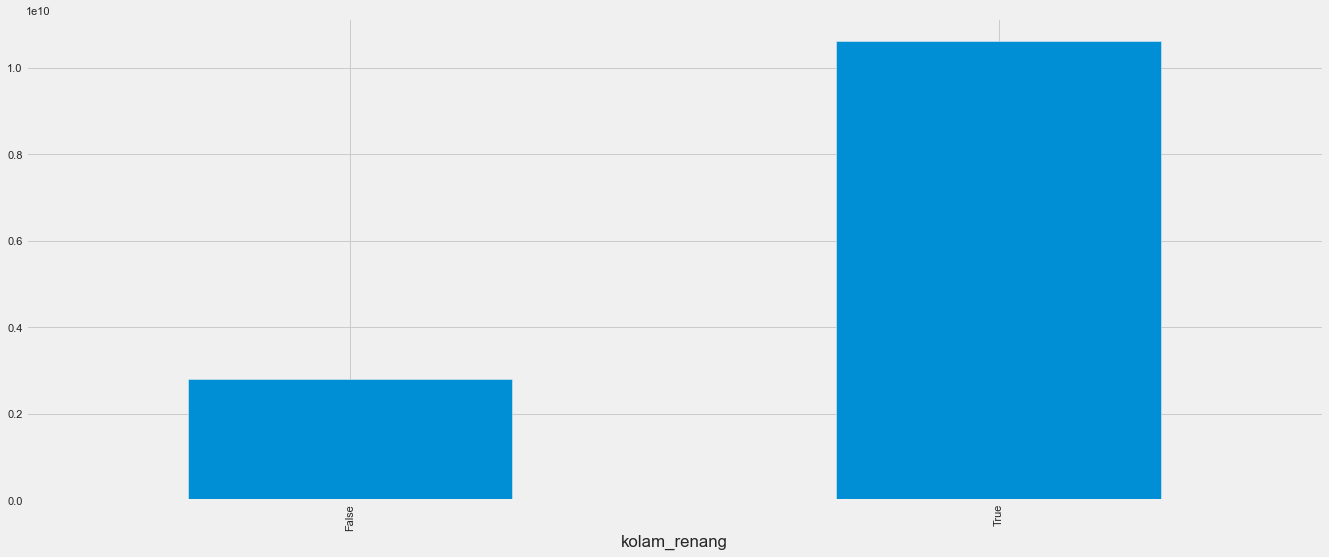

taman


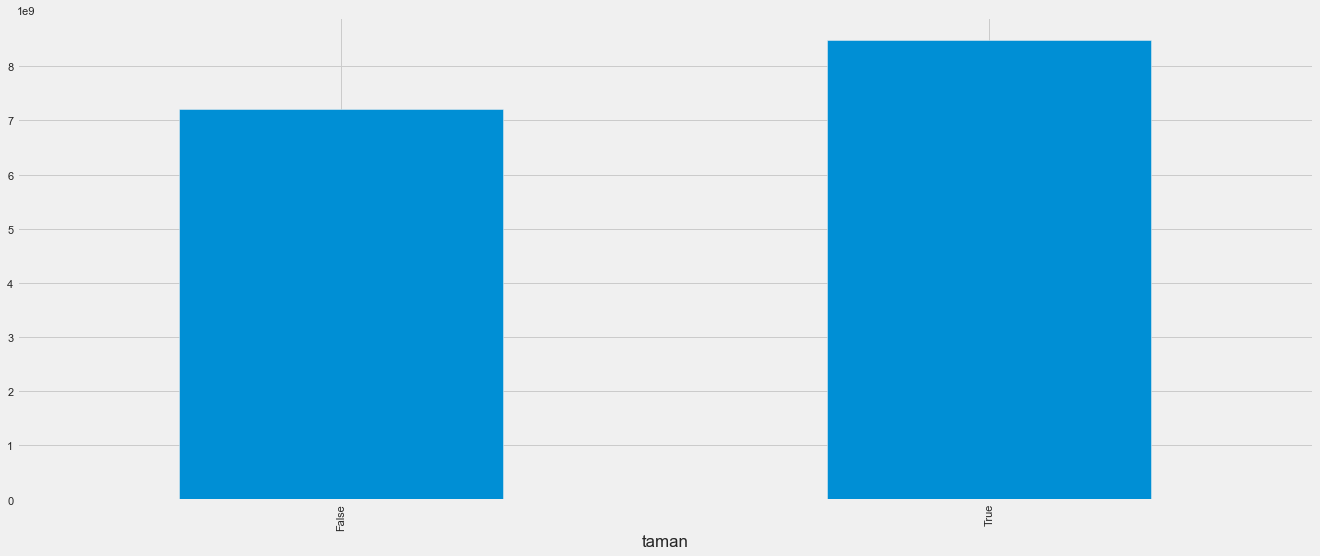

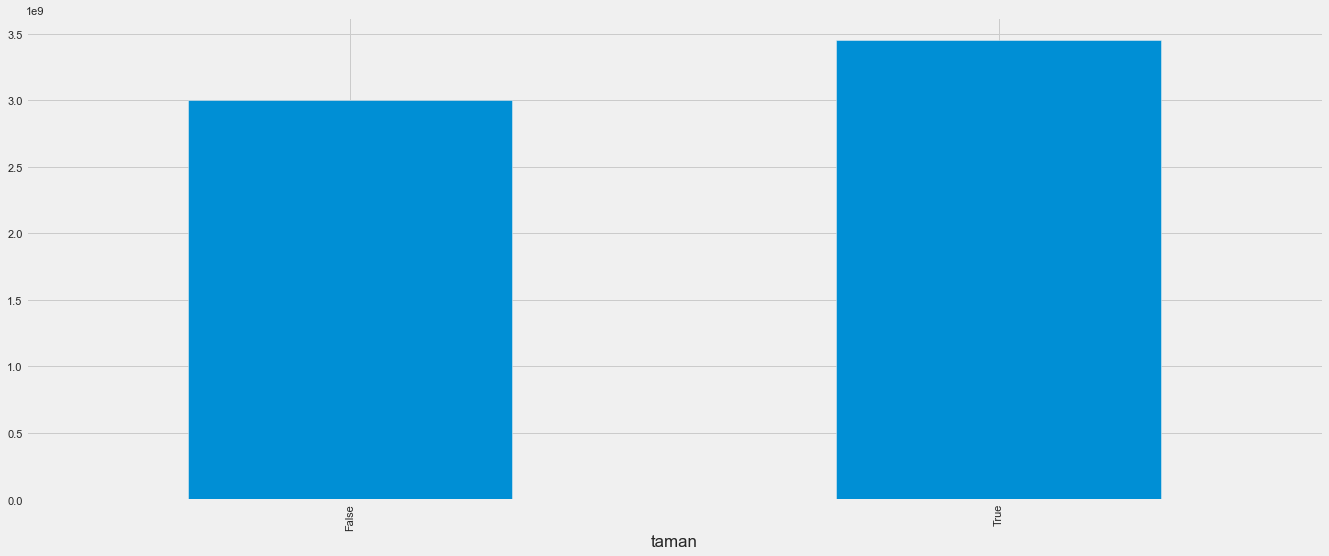

gym


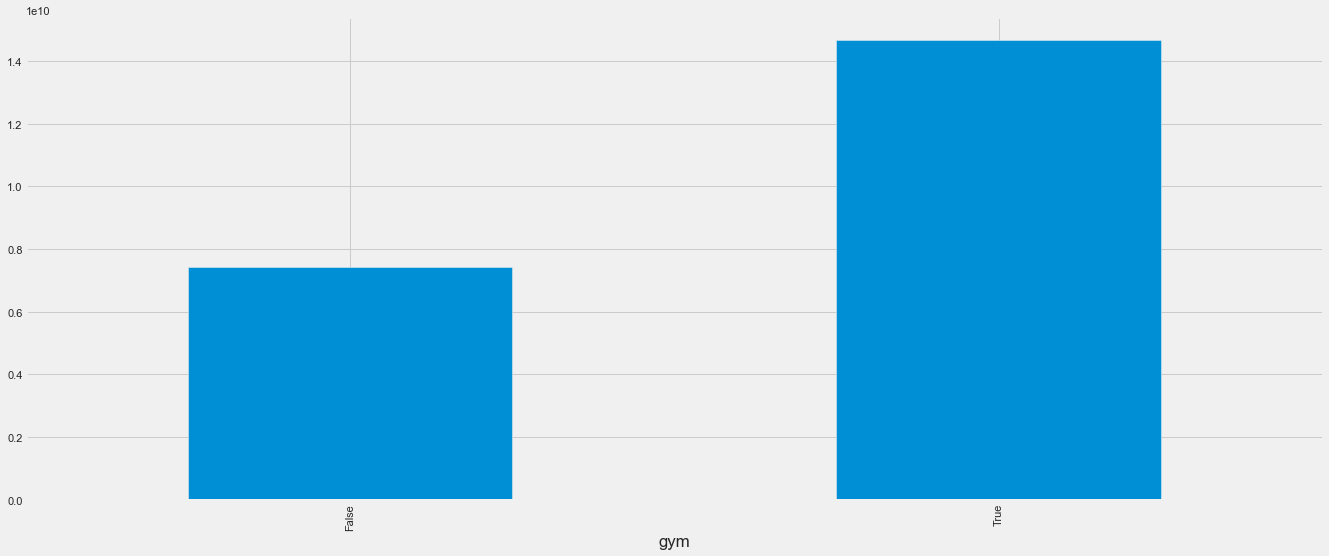

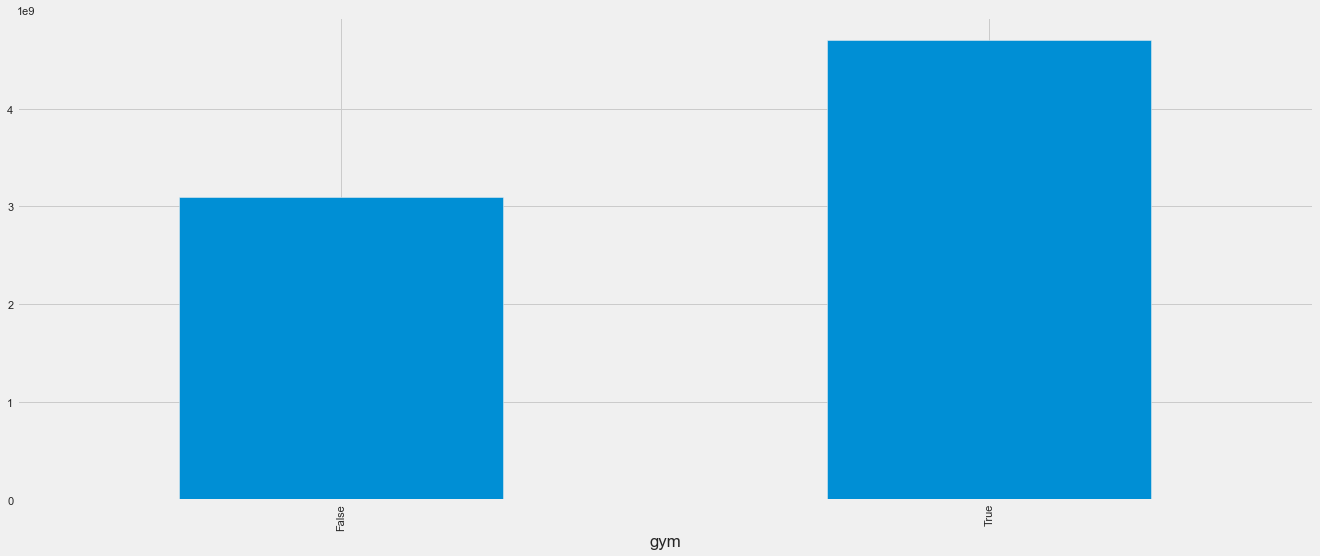

In [23]:
for i in cat:
    print(i)
    df.groupby(i)['harga'].mean().sort_values().plot.bar()
    plt.show()
    df.groupby(i)['harga'].median().sort_values().plot.bar()
    plt.show()

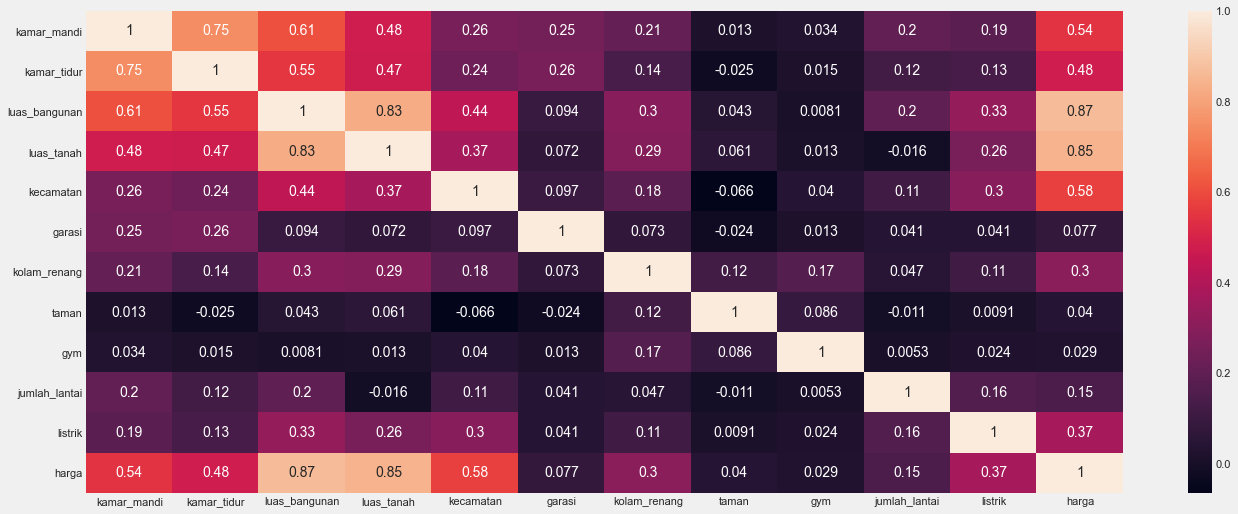

In [24]:
sns.heatmap(initial_data.corr(method = 'spearman'),annot=True)
plt.show()

In [25]:
df_experiment = df.copy()
df_experiment = df_experiment.drop(
    ['garasi','jumlah_lantai','gym'],  axis = 1
)

In [26]:
from feature_engine.outliers import OutlierTrimmer as OT

In [27]:
trimer =capper = OT(
    capping_method ='quantiles', 
    tail = 'right', 
    fold = 0.1, 
    variables = ['harga']
)
trimer.fit(df_experiment)

OutlierTrimmer(capping_method='quantiles', fold=0.1, variables=['harga'])

In [28]:
df_experiment = trimer.transform(df_experiment)
df_experiment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11744 entries, 0 to 13513
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   kamar_mandi    11744 non-null  int64  
 1   kamar_tidur    11744 non-null  int64  
 2   luas_bangunan  11744 non-null  float64
 3   luas_tanah     11744 non-null  float64
 4   harga          11744 non-null  float64
 5   kecamatan      11744 non-null  object 
 6   kolam_renang   11744 non-null  object 
 7   taman          11744 non-null  object 
 8   listrik        11744 non-null  float64
dtypes: float64(4), int64(2), object(3)
memory usage: 917.5+ KB


In [29]:
df_experiment['kecamatan'].nunique()

42

In [30]:
df_experiment.describe()

,kamar_mandi,kamar_tidur,luas_bangunan,luas_tanah,harga,listrik
count,11744.000000,11744.000000,11744.000000,11744.000000,1.174400e+04,11744.000000
mean,3.833447,4.822803,221.563607,185.417064,4.013034e+09,5446.077316
std,2.035958,2.507253,173.709839,189.628904,3.494176e+09,8118.221797
min,1.000000,1.000000,21.000000,22.000000,5.500000e+07,130.000000
25%,3.000000,4.000000,110.000000,90.000000,1.600000e+09,2200.000000
50%,4.000000,4.000000,180.000000,133.000000,2.800000e+09,2200.000000
75%,4.000000,5.000000,285.000000,220.000000,5.200000e+09,4400.000000
max,29.000000,40.000000,6075.000000,7000.000000,1.650000e+10,85000.000000


In [31]:
cat = [i for i in df_experiment.columns if df_experiment[i].dtypes =='O']

In [32]:
oe = OE(variables = [i for i in cat])
oe.fit(df_experiment,df_experiment['harga'])

OrdinalEncoder(variables=['kecamatan', 'kolam_renang', 'taman'])

In [33]:
x = oe.transform(df_experiment)

In [34]:
x_scale = ss()
x_scale.fit(x.drop('harga',axis = 1))
y_scale = ss()
y_scale.fit(x[['harga']])

StandardScaler()

In [35]:
x = x_scale.transform(x.drop(['harga'],axis = 1))
y = y_scale.transform(df_experiment[['harga']])
x = pd.DataFrame(x)
y = pd.DataFrame(y)
x.columns = df_experiment.drop('harga', axis = 1).columns
y.columns = ['harga']
initial_data = pd.concat([x,y],axis = 1)
x = sm.add_constant(x)

In [36]:
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  harga   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     2392.
Date:                Mon, 24 May 2021   Prob (F-statistic):               0.00
Time:                        05:33:21   Log-Likelihood:                -10984.
No. Observations:               11744   AIC:                         2.199e+04
Df Residuals:                   11735   BIC:                         2.205e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -7.633e-17      0.006  -1.34e-14      1.000      -0.011       0.011
kamar_mandi       0.0850      0.009      9.147      0.000       0.067       0.103
kamar_tidur      -0.0182      0.009     -2.009      0.045      -0.036      -0.000
luas_bangunan     0.3797      0.009     44.555      0.000       0.363       0.396
luas_tanah        0.2654      0.008     33.706      0.000       0.250       0.281
kecamatan         0.3002      0.006     50.351      0.000       0.288       0.312
kolam_renang      0.0985      0.006     16.664      0.000       0.087       0.110
taman             0.0195      0.006      3.374      0.001       0.008       0.031
listrik           0.0253      0.006      4.388      0.000       0.014       0.037
==============================================================================
Omnibus:                    12638.875   Durbin-Watson:                   1.854
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         14305515.221
Skew:                          -4.488   Prob(JB):                         0.00
Kurtosis:                     173.746   Cond. No.                         3.40
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

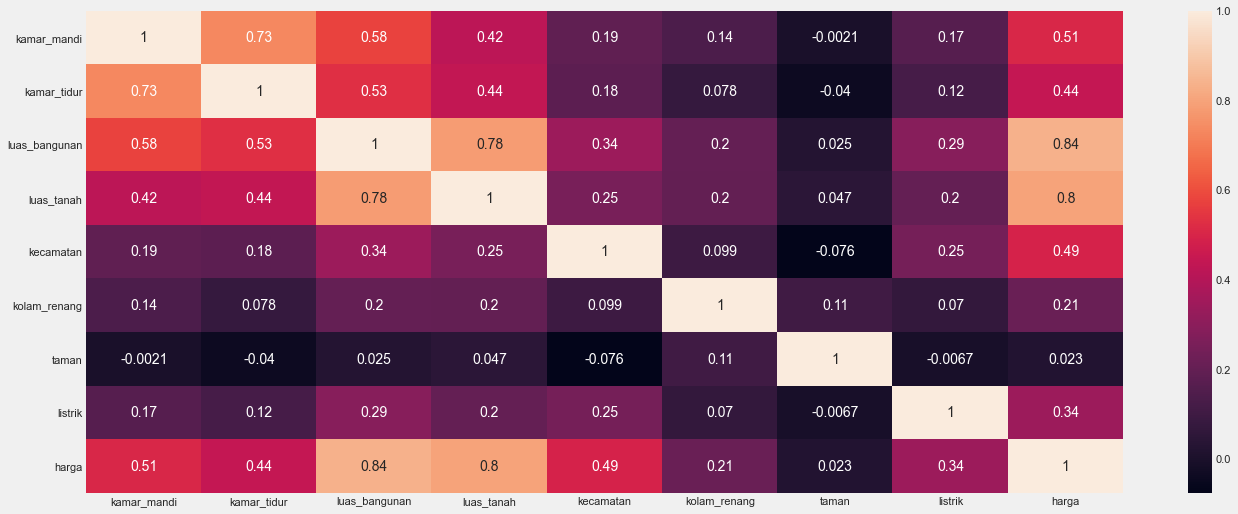

In [37]:
sns.heatmap(initial_data.corr(method = 'spearman'),annot=True)
plt.show()

In [38]:
pd.DataFrame(model.params).reset_index().sort_values(by = 0, ascending = False)

,index,0
3,luas_bangunan,3.797028e-01
5,kecamatan,3.001816e-01
4,luas_tanah,2.654150e-01
6,kolam_renang,9.851418e-02
1,kamar_mandi,8.495893e-02
8,listrik,2.530379e-02
7,taman,1.945983e-02
0,const,-7.632783e-17
2,kamar_tidur,-1.819269e-02


<AxesSubplot:>

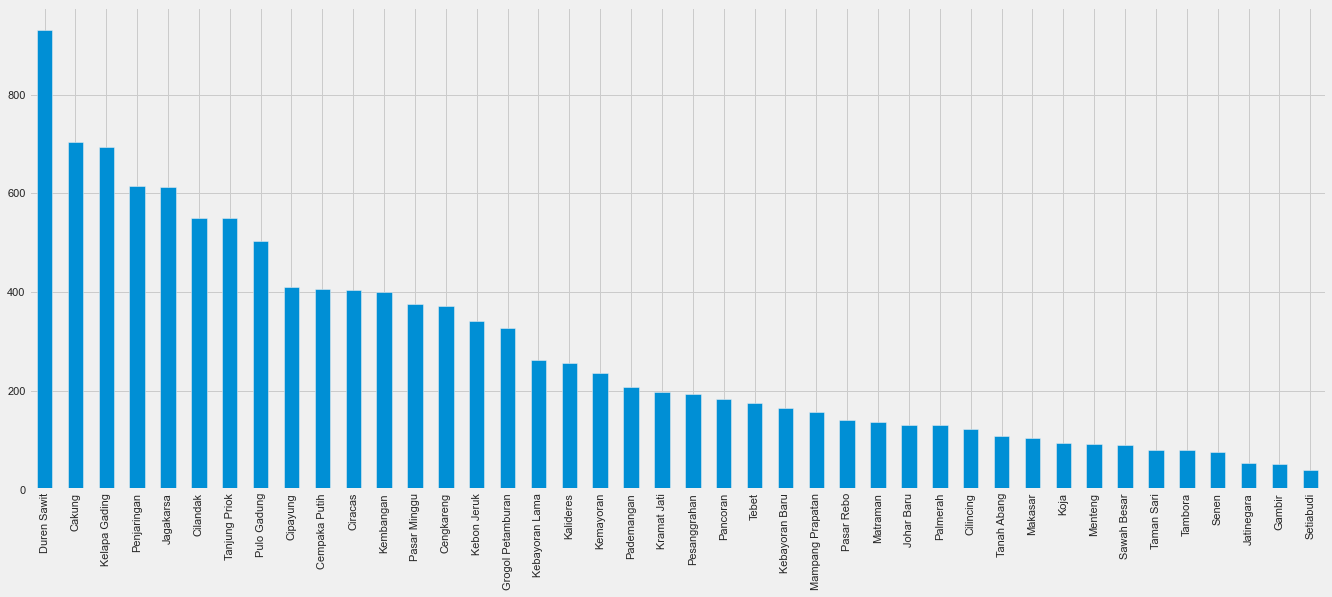

In [39]:
df_experiment['kecamatan'].value_counts().plot.bar()

<AxesSubplot:xlabel='kecamatan'>

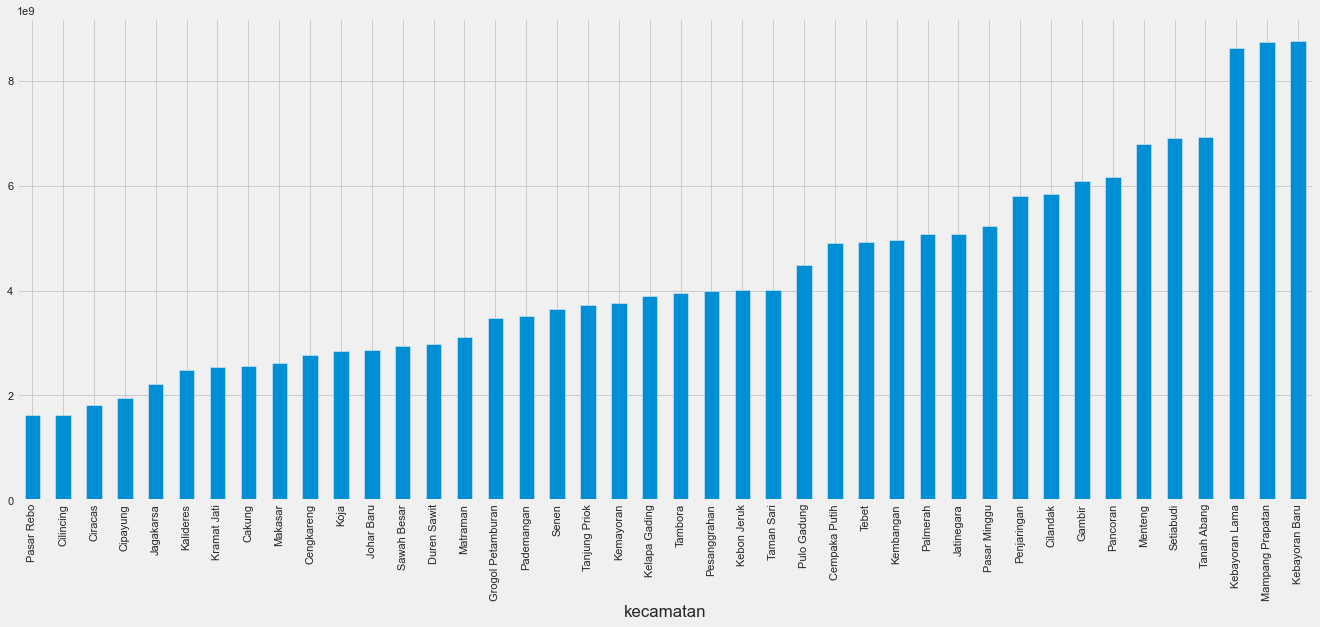

In [40]:
df_experiment.groupby('kecamatan')['harga'].mean().sort_values().plot.bar()

<AxesSubplot:xlabel='kecamatan'>

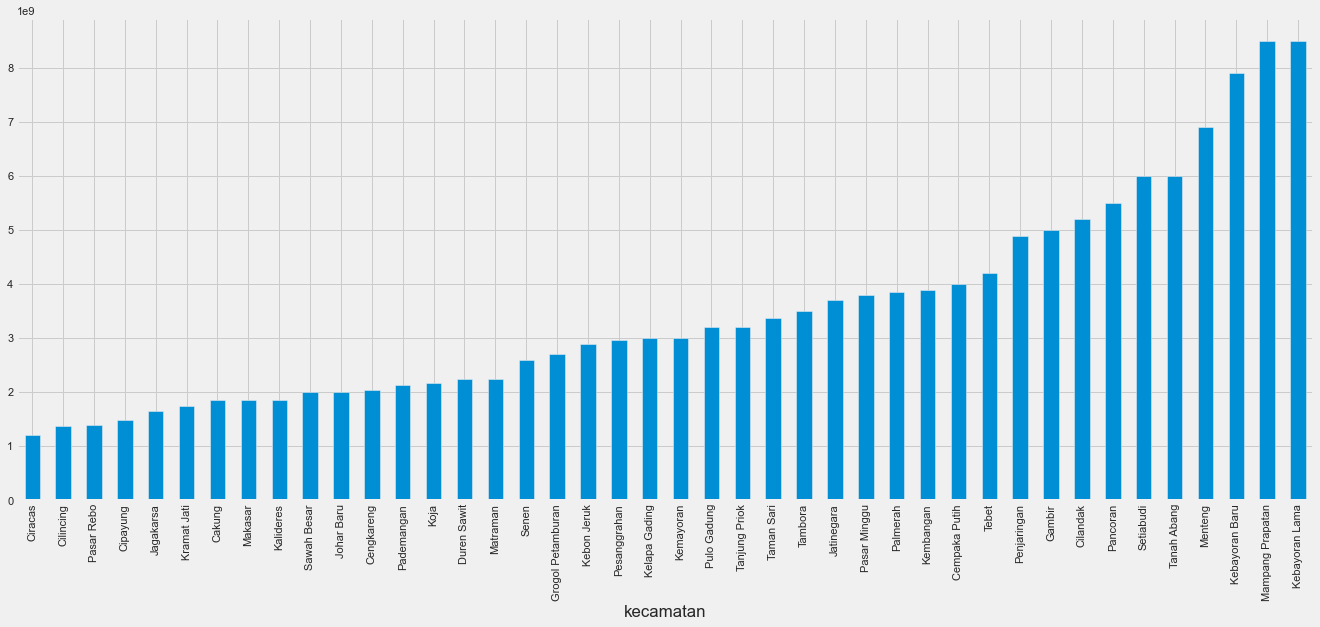

In [41]:
df_experiment.groupby('kecamatan')['harga'].median().sort_values().plot.bar()